In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import gc

from utils import *
from data import MnistTF
from nn_kd import *
from layers import *
# from models import *

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# check_available_device()
# seed settings
set_rand_seed(0)

In [4]:
# read Mnist data
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    print_obj(X_val, 'X_val')
    print_obj(y_val, 'y_val')
    print_obj(X_test, 'X_test')
    print_obj(y_test, 'y_test')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
X_val <class 'numpy.ndarray'> (5000, 784)
y_val <class 'numpy.ndarray'> (5000, 10)
X_test <class 'numpy.ndarray'> (10000, 784)
y_test <class 'numpy.ndarray'> (10000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [5]:
def build_big_model(input_dims, output_dims):#, session):
    # session settings
    session = create_session(gpu_id='1')
#     tf.reset_default_graph()
    bigmodel = SoftenedNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.8))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.5))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
    bigmodel.add_layer(
        Dropout(inputs=bigmodel.h[-1], keep_prob=0.5))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    bigmodel.compile_nn(
        loss=tf.losses.softmax_cross_entropy(bigmodel.ys,bigmodel.logits)
        , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
        , metrics = ['acc'])

    return bigmodel

In [6]:
if try_cls2:
#     teacher = build_big_model(input_dims, output_dims, session)
    teacher = build_big_model(input_dims, output_dims)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100
        ,earlystop_params={'monitor':'val_acc', 'patience':10}
    )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2140587188193074554
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7290241024
locality {
  bus_id: 1
}
incarnation: 9963265645129721232
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 15.539718 , acc = 0.25 
Epoch 1 , step 100 , loss= 0.67756766 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.3613251 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.29772457 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.47271234 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.18727294 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.46694806 val_loss= 0.13452251 , acc = 0.92 val acc = 0.9604 
Epoch 1 finished, loss= 0.73732036 val loss= 0.13452251 ,  acc = 0.9267091 val acc = 0.9604
val_acc improved. 
Epoch 2 , step 50 , loss= 0.13549873 , acc = 0.98 
Epoch 2 , step 150 , loss= 0.1574311 , acc = 0.95 
Epoch 2 , step 250 , loss= 0.13490856

Epoch 17 , step 400 , loss= 0.009448363 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.1696227 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.17543086 val_loss= 0.059642848 , acc = 0.99 val acc = 0.9842 
Epoch 17 finished, loss= 0.06095493 val loss= 0.059642848 ,  acc = 0.99563634 val acc = 0.9842
val_acc improved. 
Epoch 18 , step 50 , loss= 0.0059836544 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.042582884 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.053606935 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.10407128 , acc = 0.99 
Epoch 18 , step 450 , loss= 0.02603545 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.02313027 val_loss= 0.067885734 , acc = 1.0 val acc = 0.9828 
Epoch 18 finished, loss= 0.06122115 val loss= 0.067885734 ,  acc = 0.9959636 val acc = 0.9828

Epoch 19 , step 0 , loss= 0.060848676 , acc = 0.98 
Epoch 19 , step 100 , loss= 0.038689516 , acc = 0.99 
Epoch 19 , step 200 , loss= 0.085761726 , acc = 0.99 
Epoch 19 , step 300 , loss= 0.022091161 , acc = 1.0 
Epoch 19 , step 400 , loss

Plotting loss...


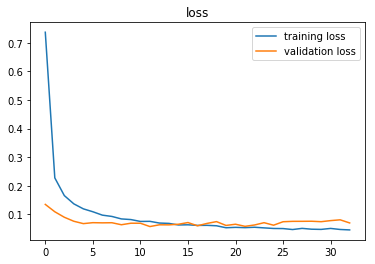

Plotting metrics...


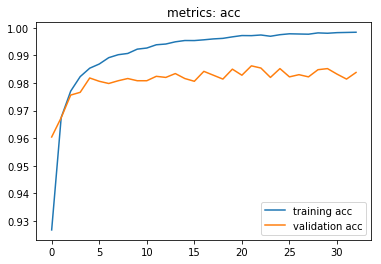

train {'acc': 0.9984909}
test {'acc': 0.9852}


In [7]:
if try_cls2:
#     gc.collect()
    teacher.plt_loss()
    teacher.plt_metrics()
    train_metric = teacher.get_metrics(X_train, y_train)
    test_metric = teacher.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

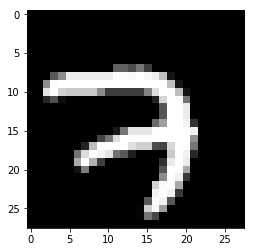

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[5.8951951e-21 5.4137386e-14 5.1381303e-08 1.0082446e-05 7.8810275e-15
 2.7289897e-13 7.9462230e-25 9.9998987e-01 2.5420270e-15 1.0376383e-10]


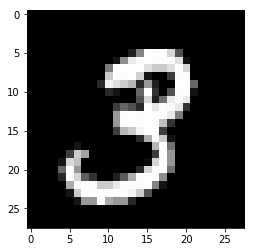

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[2.3776981e-26 4.7952771e-21 4.5125868e-22 1.0000000e+00 3.0938158e-24
 2.2061990e-15 3.2829756e-32 2.6528269e-19 5.9513221e-11 3.3762850e-11]


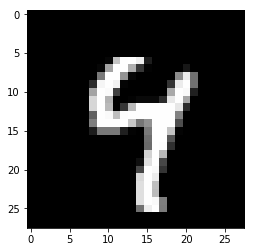

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[4.6652274e-14 7.0741611e-12 4.6170696e-11 1.7230573e-10 9.9928290e-01
 3.5337311e-10 3.4729852e-14 1.3077302e-08 1.4237541e-09 7.1711413e-04]


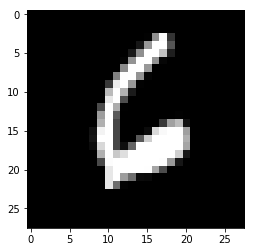

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1.0584930e-12 2.1290415e-16 1.4556639e-14 5.2719161e-18 3.9374849e-12
 4.6789550e-09 1.0000000e+00 6.0433969e-21 1.1146571e-12 2.5639042e-13]


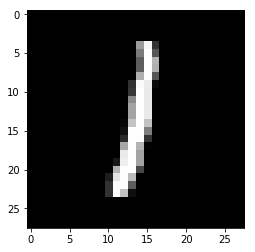

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.0691245e-18 1.0000000e+00 5.7530379e-17 1.6820810e-21 7.9435032e-13
 3.4116237e-22 3.1418865e-18 3.4548299e-14 1.8650897e-13 5.8445403e-20]


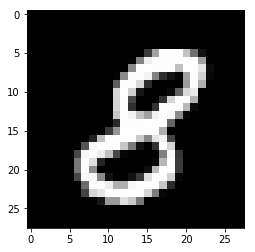

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[4.45660753e-09 6.98221148e-10 1.31966225e-08 3.29014771e-09
 5.78068030e-13 2.65072859e-11 1.20277503e-11 1.35103961e-12
 1.00000000e+00 1.24813120e-11]


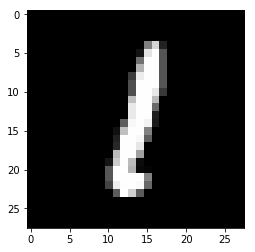

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.7134629e-17 1.0000000e+00 1.1008096e-16 6.5815986e-22 2.1998229e-13
 7.0361327e-20 1.1362644e-16 1.1023861e-15 2.0189348e-11 2.5106664e-21]


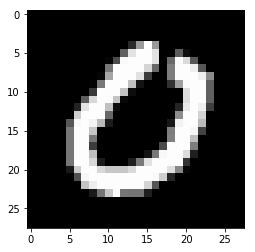

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0000000e+00 8.4906194e-37 3.1959822e-25 2.5954008e-34 4.4829348e-31
 7.0143722e-35 1.4448063e-26 7.9894477e-29 1.2803069e-32 8.3431759e-24]


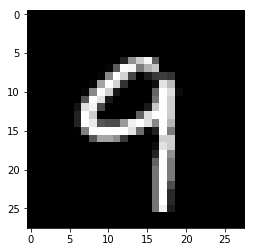

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3.32574596e-16 2.41377110e-17 2.13290096e-14 1.07408075e-10
 6.47989973e-09 1.51639687e-13 1.21947780e-20 9.02730668e-12
 2.42605935e-12 1.00000000e+00]


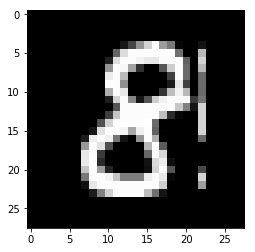

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[8.0255816e-11 1.1608648e-09 3.6190864e-09 8.5162166e-10 1.6388110e-11
 1.4790570e-12 2.9083837e-13 1.3692497e-14 1.0000000e+00 7.3122654e-12]


In [8]:
if try_cls2:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = teacher
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

## Small Model and Student Model

In [9]:

def build_small_model(input_dims, output_dims, is_student):#, session):
    # session settings
    session = create_session(gpu_id='1')
#     tf.reset_default_graph()
    smallmodel = StudentNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=800,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=800,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    if is_student:
        smallmodel.compile_student(
            loss_standard=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3) #TODO: learning rate
            , metrics = ['acc']
        )
    else:
        smallmodel.compile_nn(
            loss=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
            , metrics = ['acc']
        )
    return smallmodel

### Training Small Model without Teacher

In [10]:
train_small = True
# gc.collect()
if try_cls2 and train_small:
#     small = build_small_model(input_dims, output_dims, session, is_student=False)
    small = build_small_model(input_dims, output_dims, is_student=False)
    small.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100
        ,earlystop_params={'monitor':'val_acc', 'patience':10}
    )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5782820028443873304
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6575007335
locality {
  bus_id: 1
}
incarnation: 13727882349491049006
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.86526 , acc = 0.22 
Epoch 1 , step 100 , loss= 0.08163803 , acc = 0.99 
Epoch 1 , step 200 , loss= 0.26434872 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.22078446 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.03255281 , acc = 1.0 
Epoch 1 , step 500 , loss= 0.10495565 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.1781516 val_loss= 0.103014745 , acc = 0.96 val acc = 0.968 
Epoch 1 finished, loss= 0.23336403 val loss= 0.103014745 ,  acc = 0.95016366 val acc = 0.968
val_acc improved. 
Epoch 2 , step 50 , loss= 0.0144333625 , acc = 1.0 
Epoch 2 , step 150 , loss= 0.03536658 , acc = 0.99 
Epoch 2 , step 250 , loss= 0.0511816

Epoch 17 , step 300 , loss= 0.00032396265 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.011827279 , acc = 1.0 
Epoch 17 , step 500 , loss= 2.9633138e-05 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0037018107 val_loss= 0.10835622 , acc = 1.0 val acc = 0.9812 
Epoch 17 finished, loss= 0.009718147 val loss= 0.10835622 ,  acc = 0.9998363 val acc = 0.9812

Epoch 18 , step 50 , loss= 0.019751366 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.001846877 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.009689937 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.00043013715 , acc = 1.0 
Epoch 18 , step 450 , loss= 9.123598e-05 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.017510599 val_loss= 0.109318234 , acc = 1.0 val acc = 0.9844 
Epoch 18 finished, loss= 0.011718794 val loss= 0.109318234 ,  acc = 0.99960005 val acc = 0.9844
val_acc improved. 
Epoch 19 , step 0 , loss= 0.00019760743 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.003264293 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.00013030575 , acc = 1.0 
Epoch 19 , step

Small model
Plotting loss...


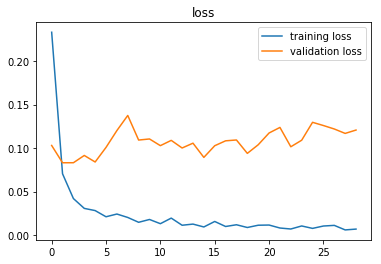

Plotting metrics...


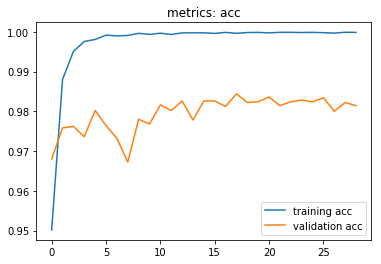

train {'acc': 0.99741817}
test {'acc': 0.9783}


In [11]:
if try_cls2 and train_small:
    print('Small model')
    small.plt_loss()
    small.plt_metrics()
    train_metric = small.get_metrics(X_train, y_train)
    test_metric = small.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

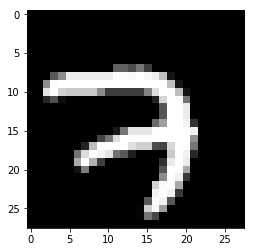

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[3.1559453e-18 1.9134557e-17 5.3439697e-09 6.1809618e-07 9.2281541e-19
 3.2607050e-15 2.8835551e-27 9.9999762e-01 1.9115213e-18 1.7782021e-06]


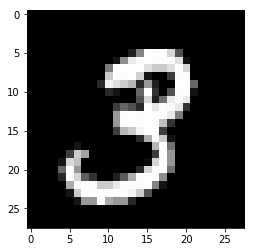

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1.1030347e-36 5.0568398e-32 6.4567309e-31 1.0000000e+00 0.0000000e+00
 2.6227304e-27 0.0000000e+00 1.5011628e-27 4.0724476e-21 2.9670566e-22]


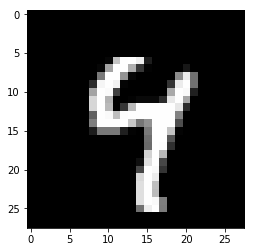

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.15121001e-19 3.90903184e-13 9.00452351e-15 2.34974475e-12
 9.99999881e-01 1.86311105e-11 1.23011290e-18 1.09017274e-11
 4.86841730e-12 9.60781321e-08]


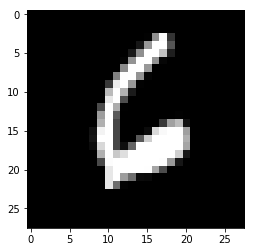

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[6.7882515e-19 2.4582121e-20 2.8165581e-21 1.6123371e-21 2.5002527e-18
 4.7720532e-11 1.0000000e+00 2.1587184e-25 5.4239060e-20 4.2359562e-19]


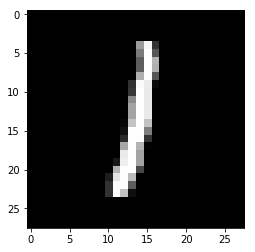

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.0180938e-17 1.0000000e+00 1.3820771e-11 7.1442562e-15 5.5160932e-12
 7.8379773e-19 2.4358076e-14 6.3648015e-10 3.1005038e-12 6.5440621e-17]


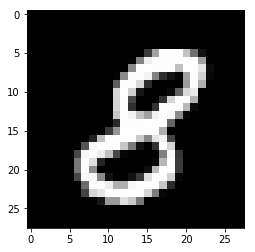

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[8.7762899e-16 9.9580681e-20 5.6415122e-15 9.2714855e-12 2.1951738e-25
 7.2533658e-20 5.3094526e-19 5.2900109e-24 1.0000000e+00 1.7089058e-17]


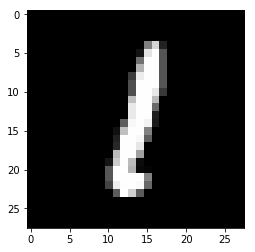

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[4.4438658e-13 1.0000000e+00 1.0582484e-09 4.7911095e-13 4.3791637e-12
 2.0561427e-17 8.0327704e-13 6.8907519e-10 4.9762561e-10 4.3686551e-18]


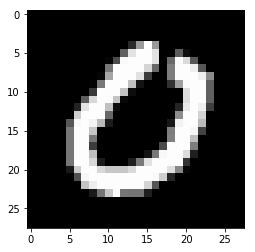

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0000000e+00 1.5723825e-28 3.1754574e-17 5.1410198e-25 3.5550045e-30
 7.6811423e-31 2.0141871e-20 2.1511106e-21 2.7916964e-30 2.8020798e-21]


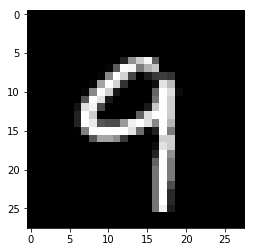

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3.1859100e-21 2.8930546e-23 1.2505757e-19 2.7220930e-09 8.8212288e-17
 2.6118049e-14 1.1823348e-24 2.5763751e-17 5.2200942e-15 1.0000000e+00]


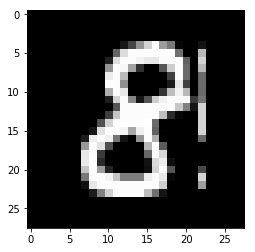

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[6.3229130e-17 1.8564113e-14 6.6302768e-09 2.9544449e-08 3.3543831e-19
 3.5281045e-16 3.0435965e-17 8.6148340e-20 1.0000000e+00 1.6817631e-14]


In [12]:
if try_cls2 and train_small:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = small
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

### Experiments on Students without Effect of $T^2$

In [19]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])

temperatures = [5,10,15,20,25,30]#[35,40]

list_exp = []
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    set_rand_seed(0)
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    coef_soft_losses = [1.0, 0.75, 0.5, 0.25, 0.0]
    tmp_effect = 1 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=50
            ,display_steps=100
            ,earlystop_params={'monitor':'val_acc', 'patience':10}
        )
        # show result
        print('Student performance with',dict_exp)
#         print('Student performance with temperature =',temperature,
#              ', coef_softloss =',coef_softloss,',tmp_effi =', tmp_effect,'. ')
        student.plt_loss()
        student.plt_metrics()
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        print('train',train_metric)
        print('test',test_metric)
        print()
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        list_exp.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp = pd.DataFrame(list_exp)
print(test_metrics)
print(df_exp)

Training student with temperature = 35 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 


TypeError: super(type, obj): obj must be an instance or subtype of type

In [14]:
print(test_metrics)
print(df_exp)
print(df_exp['test_acc'].mean())

{5: [{'acc': 0.9828}, {'acc': 0.9844}, {'acc': 0.9852}, {'acc': 0.9847}, {'acc': 0.9824}], 10: [{'acc': 0.9828}, {'acc': 0.9828}, {'acc': 0.9846}, {'acc': 0.9847}, {'acc': 0.9803}], 15: [{'acc': 0.9809}, {'acc': 0.985}, {'acc': 0.9841}, {'acc': 0.9851}, {'acc': 0.9806}], 20: [{'acc': 0.9816}, {'acc': 0.9763}, {'acc': 0.9786}, {'acc': 0.9856}, {'acc': 0.981}], 25: [{'acc': 0.9822}, {'acc': 0.9812}, {'acc': 0.9855}, {'acc': 0.9862}, {'acc': 0.9785}], 30: [{'acc': 0.9823}, {'acc': 0.9858}, {'acc': 0.9856}, {'acc': 0.9795}, {'acc': 0.9832}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            0.00           1.00            5                   1    0.9828   
1            0.25           0.75            5                   1    0.9844   
2            0.50           0.50            5                   1    0.9852   
3            0.75           0.25            5                   1    0.9847   
4            1.00           0.00            5                

## Experiments on Students with $T^2$ Effect

Training student with temperature = 5 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 25 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10496770071600476094
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 12637055378921673508
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 62.535393 , acc = 0.57 
Epoch 1 , step 100 , loss= 12.426744 , acc = 0.94 
Epoch 1 , step 200 , loss= 12.426508 , acc = 0.96 
Epoch 1 , step 300 , loss= 12.21888 , acc = 0.96 
Epoch 1 , step 400 , loss= 9.791914 , acc = 0.98 
Epoch 1 , step 500 , loss= 10.740862 , acc = 0.98 
Epoch 1 , step 549 , loss= 10.047836 val_loss= 10.19108 , acc = 0.98 val acc = 0.9738 
Epoch 1 finished, loss= 12.462108 val loss= 10.19108 ,  acc = 0.9537638 val acc = 0.9738
val_acc improved. 
Epoch 2 , step 50 , loss= 10.045929 , acc = 0.9

Epoch 18 , step 50 , loss= 10.58722 , acc = 1.0 
Epoch 18 , step 150 , loss= 9.085873 , acc = 1.0 
Epoch 18 , step 250 , loss= 9.515141 , acc = 1.0 
Epoch 18 , step 350 , loss= 9.68428 , acc = 0.99 
Epoch 18 , step 450 , loss= 11.090617 , acc = 1.0 
Epoch 18 , step 549 , loss= 10.332248 val_loss= 9.499942 , acc = 1.0 val acc = 0.9822 
Epoch 18 finished, loss= 9.432044 val loss= 9.499942 ,  acc = 0.99779993 val acc = 0.9822

Epoch 19 , step 0 , loss= 10.566459 , acc = 1.0 
Epoch 19 , step 100 , loss= 6.5107517 , acc = 1.0 
Epoch 19 , step 200 , loss= 8.413746 , acc = 1.0 
Epoch 19 , step 300 , loss= 10.403558 , acc = 1.0 
Epoch 19 , step 400 , loss= 8.46922 , acc = 1.0 
Epoch 19 , step 500 , loss= 9.30726 , acc = 1.0 
Epoch 19 , step 549 , loss= 8.719078 val_loss= 9.505091 , acc = 1.0 val acc = 0.9814 
Epoch 19 finished, loss= 9.430863 val loss= 9.505091 ,  acc = 0.99778175 val acc = 0.9814

Epoch 20 , step 50 , loss= 11.616417 , acc = 1.0 
Epoch 20 , step 150 , loss= 10.736891 , acc = 

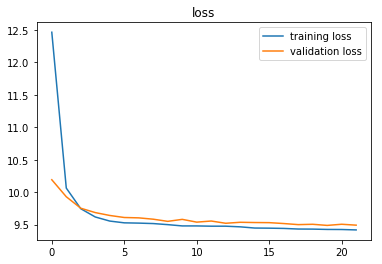

Plotting metrics...


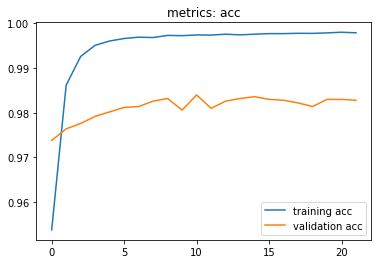

train {'acc': 0.99767274}
test {'acc': 0.983}

Training student with temperature = 5 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 25 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17905010695274052631
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 14221147514642903255
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 48.631195 , acc = 0.56 
Epoch 1 , step 100 , loss= 10.275496 , acc = 0.94 
Epoch 1 , step 200 , loss= 7.623542 , acc = 0.96 
Epoch 1 , step 300 , loss= 8.387015 , acc = 0.98 
Epoch 1 , step 400 , loss= 7.8628306 , acc = 0.98 
Epoch 1 , step 500 , loss= 9.858328 , acc = 0.97 
Epoch 1 , step 549 , loss= 6.155583 val_loss= 7.6898613 , acc = 1.0 val acc = 0.974 
Epoch 1 finished, loss= 9.481692 val loss= 7.6898613 ,  acc = 0.95405453 val acc = 0.974
val_acc improved. 
E

Epoch 18 , step 50 , loss= 7.4352746 , acc = 1.0 
Epoch 18 , step 150 , loss= 6.1899858 , acc = 1.0 
Epoch 18 , step 250 , loss= 7.542998 , acc = 1.0 
Epoch 18 , step 350 , loss= 8.781742 , acc = 1.0 
Epoch 18 , step 450 , loss= 6.366401 , acc = 1.0 
Epoch 18 , step 549 , loss= 7.7750134 val_loss= 7.148831 , acc = 0.99 val acc = 0.9832 
Epoch 18 finished, loss= 7.07878 val loss= 7.148831 ,  acc = 0.9988545 val acc = 0.9832

Epoch 19 , step 0 , loss= 8.557079 , acc = 1.0 
Epoch 19 , step 100 , loss= 7.3191395 , acc = 1.0 
Epoch 19 , step 200 , loss= 5.5252376 , acc = 1.0 
Epoch 19 , step 300 , loss= 8.372117 , acc = 1.0 
Epoch 19 , step 400 , loss= 7.3590455 , acc = 1.0 
Epoch 19 , step 500 , loss= 6.7844043 , acc = 1.0 
Epoch 19 , step 549 , loss= 8.00959 val_loss= 7.1530995 , acc = 1.0 val acc = 0.9826 
Epoch 19 finished, loss= 7.073121 val loss= 7.1530995 ,  acc = 0.9988545 val acc = 0.9826

Epoch 20 , step 50 , loss= 7.581148 , acc = 1.0 
Epoch 20 , step 150 , loss= 8.311333 , acc =

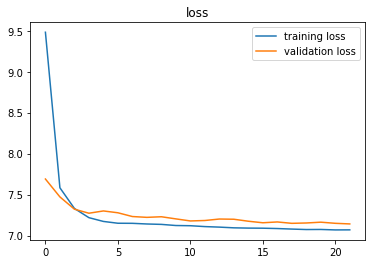

Plotting metrics...


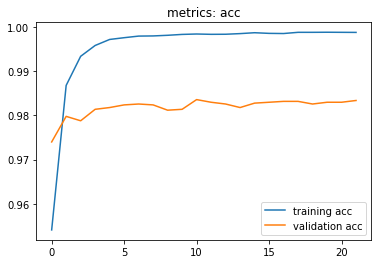

train {'acc': 0.9984}
test {'acc': 0.9847}

Training student with temperature = 5 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 25 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15311623555216841851
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 5997461048237646984
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 33.41015 , acc = 0.5 
Epoch 1 , step 100 , loss= 8.301812 , acc = 0.9 
Epoch 1 , step 200 , loss= 7.063227 , acc = 0.98 
Epoch 1 , step 300 , loss= 5.1246924 , acc = 0.97 
Epoch 1 , step 400 , loss= 6.475932 , acc = 0.93 
Epoch 1 , step 500 , loss= 5.2168427 , acc = 0.99 
Epoch 1 , step 549 , loss= 4.8790345 val_loss= 5.201962 , acc = 0.97 val acc = 0.972 
Epoch 1 finished, loss= 6.4401813 val loss= 5.201962 ,  acc = 0.9548909 val acc = 0.972
val_acc improved. 
Epoch 2 , 

Epoch 18 , step 50 , loss= 3.8649306 , acc = 1.0 
Epoch 18 , step 150 , loss= 4.0594926 , acc = 1.0 
Epoch 18 , step 250 , loss= 4.1439133 , acc = 1.0 
Epoch 18 , step 350 , loss= 4.1684914 , acc = 1.0 
Epoch 18 , step 450 , loss= 4.662043 , acc = 1.0 
Epoch 18 , step 549 , loss= 4.906481 val_loss= 4.80359 , acc = 1.0 val acc = 0.9836 
Epoch 18 finished, loss= 4.720606 val loss= 4.80359 ,  acc = 0.9994727 val acc = 0.9836
val_acc improved. 
Epoch 19 , step 0 , loss= 4.802096 , acc = 1.0 
Epoch 19 , step 100 , loss= 4.818761 , acc = 1.0 
Epoch 19 , step 200 , loss= 3.997749 , acc = 1.0 
Epoch 19 , step 300 , loss= 6.919111 , acc = 1.0 
Epoch 19 , step 400 , loss= 3.7506 , acc = 1.0 
Epoch 19 , step 500 , loss= 5.358963 , acc = 1.0 
Epoch 19 , step 549 , loss= 5.3404107 val_loss= 4.79739 , acc = 1.0 val acc = 0.9814 
Epoch 19 finished, loss= 4.7209487 val loss= 4.79739 ,  acc = 0.99969083 val acc = 0.9814

Epoch 20 , step 50 , loss= 3.83378 , acc = 1.0 
Epoch 20 , step 150 , loss= 3.9465

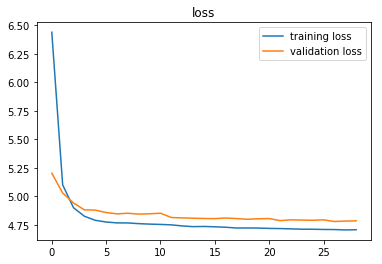

Plotting metrics...


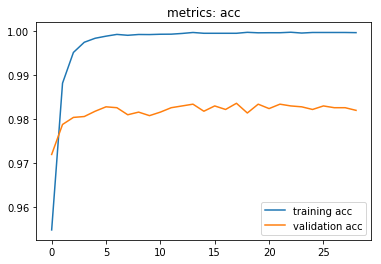

train {'acc': 0.99905455}
test {'acc': 0.9846}

Training student with temperature = 5 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 25 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18115787824371241361
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 4147154576854696435
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 18.192429 , acc = 0.46 
Epoch 1 , step 100 , loss= 3.7822165 , acc = 0.94 
Epoch 1 , step 200 , loss= 3.5971277 , acc = 0.94 
Epoch 1 , step 300 , loss= 2.9115686 , acc = 0.96 
Epoch 1 , step 400 , loss= 2.9769287 , acc = 0.96 
Epoch 1 , step 500 , loss= 3.00981 , acc = 0.98 
Epoch 1 , step 549 , loss= 3.52442 val_loss= 2.7217495 , acc = 0.97 val acc = 0.975 
Epoch 1 finished, loss= 3.4520118 val loss= 2.7217495 ,  acc = 0.95405453 val acc = 0.975
val_acc improved. 

Epoch 18 , step 50 , loss= 2.0780513 , acc = 1.0 
Epoch 18 , step 150 , loss= 2.338762 , acc = 1.0 
Epoch 18 , step 250 , loss= 2.4816358 , acc = 1.0 
Epoch 18 , step 350 , loss= 2.4889777 , acc = 1.0 
Epoch 18 , step 450 , loss= 2.9283934 , acc = 1.0 
Epoch 18 , step 549 , loss= 2.7073014 val_loss= 2.451779 , acc = 1.0 val acc = 0.9826 
Epoch 18 finished, loss= 2.375895 val loss= 2.451779 ,  acc = 0.9999818 val acc = 0.9826

Epoch 19 , step 0 , loss= 2.7569542 , acc = 1.0 
Epoch 19 , step 100 , loss= 2.8764029 , acc = 1.0 
Epoch 19 , step 200 , loss= 2.0990584 , acc = 1.0 
Epoch 19 , step 300 , loss= 2.8671331 , acc = 1.0 
Epoch 19 , step 400 , loss= 2.778106 , acc = 1.0 
Epoch 19 , step 500 , loss= 1.6490656 , acc = 1.0 
Epoch 19 , step 549 , loss= 2.9914799 val_loss= 2.436659 , acc = 1.0 val acc = 0.9842 
Epoch 19 finished, loss= 2.3658261 val loss= 2.436659 ,  acc = 0.9999818 val acc = 0.9842

Epoch 20 , step 50 , loss= 2.2459948 , acc = 1.0 
Epoch 20 , step 150 , loss= 2.0559165 ,

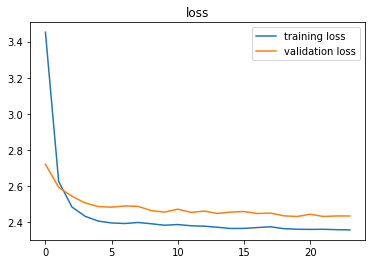

Plotting metrics...


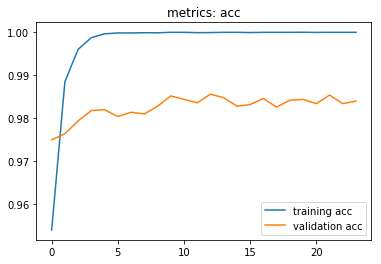

train {'acc': 0.9995273}
test {'acc': 0.9844}

Training student with temperature = 5 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 25 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4977558027418124699
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 4195652705148551796
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.67225 , acc = 0.26 
Epoch 1 , step 100 , loss= 0.34808728 , acc = 0.91 
Epoch 1 , step 200 , loss= 0.17351393 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.047541413 , acc = 1.0 
Epoch 1 , step 400 , loss= 0.15478323 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.1545244 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.04000514 val_loss= 0.10937018 , acc = 1.0 val acc = 0.967 
Epoch 1 finished, loss= 0.2489093 val loss= 0.10937018 ,  acc = 0.9450364 val acc = 0.967
val_acc improve

Epoch 17 , step 100 , loss= 0.00011221396 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.009877 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0077162194 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.00042822055 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0009217547 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.00085180777 val_loss= 0.099552505 , acc = 1.0 val acc = 0.983 
Epoch 17 finished, loss= 0.009991269 val loss= 0.099552505 ,  acc = 0.99978185 val acc = 0.983

Epoch 18 , step 50 , loss= 0.00010651789 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0002244838 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00010660936 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.003435483 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0010667169 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0020289088 val_loss= 0.11156884 , acc = 1.0 val acc = 0.9798 
Epoch 18 finished, loss= 0.0100760935 val loss= 0.11156884 ,  acc = 0.99967265 val acc = 0.9798

Epoch 19 , step 0 , loss= 0.0027652648 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.06

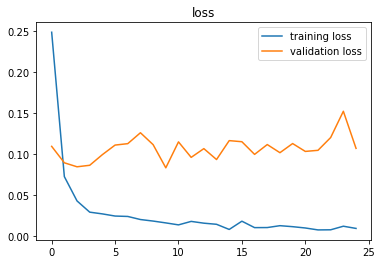

Plotting metrics...


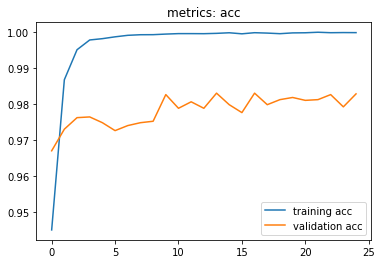

train {'acc': 0.9979636}
test {'acc': 0.9805}

Training student with temperature = 10 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12012177554724288868
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 10752124909580342767
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 238.97157 , acc = 0.4 
Epoch 1 , step 100 , loss= 111.72922 , acc = 0.94 
Epoch 1 , step 200 , loss= 102.45794 , acc = 0.97 
Epoch 1 , step 300 , loss= 110.344604 , acc = 0.95 
Epoch 1 , step 400 , loss= 101.53919 , acc = 1.0 
Epoch 1 , step 500 , loss= 118.450905 , acc = 0.98 
Epoch 1 , step 549 , loss= 107.78012 val_loss= 108.33503 , acc = 1.0 val acc = 0.973 
Epoch 1 finished, loss= 116.72094 val loss= 108.33503 ,  acc = 0.9455819 val acc = 0.973
val_acc improved

Epoch 17 , step 500 , loss= 109.89905 , acc = 0.99 
Epoch 17 , step 549 , loss= 108.4859 val_loss= 106.530396 , acc = 1.0 val acc = 0.9818 
Epoch 17 finished, loss= 108.986885 val loss= 106.530396 ,  acc = 0.9974727 val acc = 0.9818
val_acc improved. 
Epoch 18 , step 50 , loss= 109.034004 , acc = 0.99 
Epoch 18 , step 150 , loss= 99.20683 , acc = 1.0 
Epoch 18 , step 250 , loss= 111.13902 , acc = 1.0 
Epoch 18 , step 350 , loss= 115.7699 , acc = 0.98 
Epoch 18 , step 450 , loss= 109.29994 , acc = 1.0 
Epoch 18 , step 549 , loss= 100.44432 val_loss= 106.50908 , acc = 1.0 val acc = 0.9824 
Epoch 18 finished, loss= 108.95441 val loss= 106.50908 ,  acc = 0.9976181 val acc = 0.9824
val_acc improved. 
Epoch 19 , step 0 , loss= 110.28204 , acc = 1.0 
Epoch 19 , step 100 , loss= 111.254944 , acc = 1.0 
Epoch 19 , step 200 , loss= 116.97352 , acc = 0.98 
Epoch 19 , step 300 , loss= 103.36553 , acc = 1.0 
Epoch 19 , step 400 , loss= 113.19504 , acc = 1.0 
Epoch 19 , step 500 , loss= 99.477615 , 

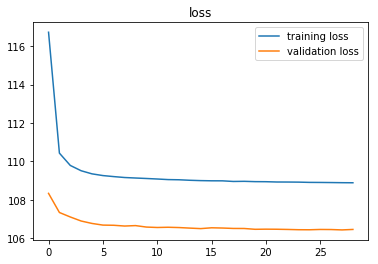

Plotting metrics...


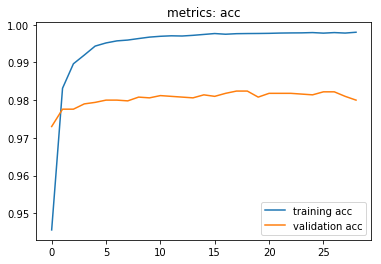

train {'acc': 0.9977273}
test {'acc': 0.9834}

Training student with temperature = 10 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11842642892697237439
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 4399783881288530659
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 172.17877 , acc = 0.51 
Epoch 1 , step 100 , loss= 89.37357 , acc = 0.91 
Epoch 1 , step 200 , loss= 83.238594 , acc = 0.99 
Epoch 1 , step 300 , loss= 79.413635 , acc = 0.98 
Epoch 1 , step 400 , loss= 92.99379 , acc = 0.96 
Epoch 1 , step 500 , loss= 86.56299 , acc = 0.99 
Epoch 1 , step 549 , loss= 81.279495 val_loss= 81.25249 , acc = 1.0 val acc = 0.971 
Epoch 1 finished, loss= 87.53712 val loss= 81.25249 ,  acc = 0.9487091 val acc = 0.971
val_acc improved. 
Ep

Epoch 18 , step 50 , loss= 81.159424 , acc = 1.0 
Epoch 18 , step 150 , loss= 80.0778 , acc = 1.0 
Epoch 18 , step 250 , loss= 92.818115 , acc = 1.0 
Epoch 18 , step 350 , loss= 75.99975 , acc = 1.0 
Epoch 18 , step 450 , loss= 87.01521 , acc = 1.0 
Epoch 18 , step 549 , loss= 86.84677 val_loss= 79.87846 , acc = 1.0 val acc = 0.9826 
Epoch 18 finished, loss= 81.73357 val loss= 79.87846 ,  acc = 0.9985636 val acc = 0.9826

Epoch 19 , step 0 , loss= 87.312416 , acc = 1.0 
Epoch 19 , step 100 , loss= 84.51026 , acc = 1.0 
Epoch 19 , step 200 , loss= 79.08938 , acc = 1.0 
Epoch 19 , step 300 , loss= 80.48204 , acc = 1.0 
Epoch 19 , step 400 , loss= 76.65629 , acc = 1.0 
Epoch 19 , step 500 , loss= 87.80328 , acc = 1.0 
Epoch 19 , step 549 , loss= 76.17634 val_loss= 79.89166 , acc = 1.0 val acc = 0.9838 
Epoch 19 finished, loss= 81.71899 val loss= 79.89166 ,  acc = 0.99867266 val acc = 0.9838

Epoch 20 , step 50 , loss= 83.670975 , acc = 1.0 
Epoch 20 , step 150 , loss= 83.38731 , acc = 1.0

Epoch 36 , step 150 , loss= 80.25526 , acc = 1.0 
Epoch 36 , step 250 , loss= 84.40515 , acc = 1.0 
Epoch 36 , step 350 , loss= 95.57543 , acc = 0.99 
Epoch 36 , step 450 , loss= 79.30654 , acc = 1.0 
Epoch 36 , step 549 , loss= 87.58555 val_loss= 79.83207 , acc = 1.0 val acc = 0.983 
Epoch 36 finished, loss= 81.64442 val loss= 79.83207 ,  acc = 0.9990909 val acc = 0.983

Epoch 37 , step 0 , loss= 75.78447 , acc = 1.0 
Epoch 37 , step 100 , loss= 86.6655 , acc = 1.0 
Epoch 37 , step 200 , loss= 73.50721 , acc = 1.0 
Epoch 37 , step 300 , loss= 75.730545 , acc = 1.0 
Epoch 37 , step 400 , loss= 77.736435 , acc = 1.0 
Epoch 37 , step 500 , loss= 77.20228 , acc = 1.0 
Epoch 37 , step 549 , loss= 81.65719 val_loss= 79.852356 , acc = 1.0 val acc = 0.9834 
Epoch 37 finished, loss= 81.64636 val loss= 79.852356 ,  acc = 0.9991817 val acc = 0.9834

Epoch 38 , step 50 , loss= 88.30949 , acc = 1.0 
Epoch 38 , step 150 , loss= 71.68814 , acc = 1.0 
Epoch 38 , step 250 , loss= 75.52701 , acc = 1.0 

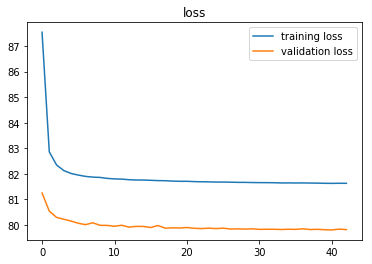

Plotting metrics...


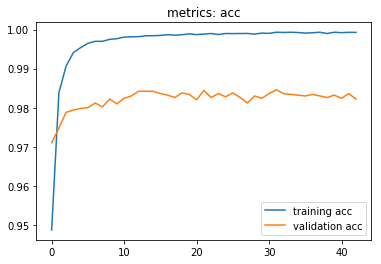

train {'acc': 0.99921817}
test {'acc': 0.9833}

Training student with temperature = 10 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5805492439849818147
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 13782171344780517809
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 117.70378 , acc = 0.47 
Epoch 1 , step 100 , loss= 63.503292 , acc = 0.93 
Epoch 1 , step 200 , loss= 61.06026 , acc = 0.94 
Epoch 1 , step 300 , loss= 57.282154 , acc = 0.97 
Epoch 1 , step 400 , loss= 54.98602 , acc = 0.99 
Epoch 1 , step 500 , loss= 50.408974 , acc = 0.97 
Epoch 1 , step 549 , loss= 52.823734 val_loss= 54.158276 , acc = 0.99 val acc = 0.9732 
Epoch 1 finished, loss= 58.443977 val loss= 54.158276 ,  acc = 0.9508 val acc = 0.9732
val_acc improved. 

Epoch 18 , step 50 , loss= 60.81908 , acc = 1.0 
Epoch 18 , step 150 , loss= 54.91613 , acc = 1.0 
Epoch 18 , step 250 , loss= 51.94144 , acc = 1.0 
Epoch 18 , step 350 , loss= 53.9597 , acc = 1.0 
Epoch 18 , step 450 , loss= 55.253666 , acc = 1.0 
Epoch 18 , step 549 , loss= 52.12279 val_loss= 53.300354 , acc = 1.0 val acc = 0.981 
Epoch 18 finished, loss= 54.48998 val loss= 53.300354 ,  acc = 0.99954545 val acc = 0.981

Epoch 19 , step 0 , loss= 54.203598 , acc = 1.0 
Epoch 19 , step 100 , loss= 52.73408 , acc = 1.0 
Epoch 19 , step 200 , loss= 58.367558 , acc = 1.0 
Epoch 19 , step 300 , loss= 60.57464 , acc = 1.0 
Epoch 19 , step 400 , loss= 54.635178 , acc = 1.0 
Epoch 19 , step 500 , loss= 58.455666 , acc = 1.0 
Epoch 19 , step 549 , loss= 50.606487 val_loss= 53.279408 , acc = 0.99 val acc = 0.9828 
Epoch 19 finished, loss= 54.47873 val loss= 53.279408 ,  acc = 0.9996544 val acc = 0.9828
val_acc improved. 
Epoch 20 , step 50 , loss= 61.016224 , acc = 1.0 
Epoch 20 , step 150 , lo

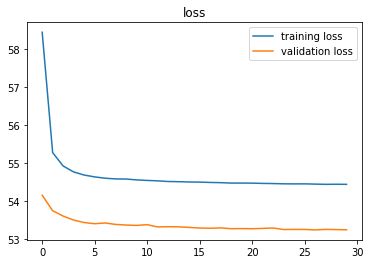

Plotting metrics...


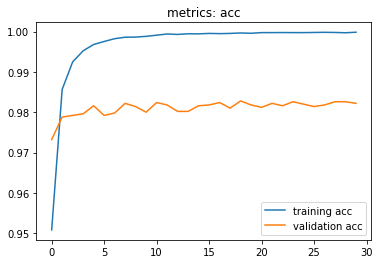

train {'acc': 0.99956363}
test {'acc': 0.9835}

Training student with temperature = 10 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8278837178716322262
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 7104262765063026761
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 61.874245 , acc = 0.36 
Epoch 1 , step 100 , loss= 29.147219 , acc = 0.94 
Epoch 1 , step 200 , loss= 30.514973 , acc = 0.95 
Epoch 1 , step 300 , loss= 26.07577 , acc = 0.97 
Epoch 1 , step 400 , loss= 29.128939 , acc = 0.97 
Epoch 1 , step 500 , loss= 28.278048 , acc = 0.96 
Epoch 1 , step 549 , loss= 30.308887 val_loss= 27.212336 , acc = 0.93 val acc = 0.975 
Epoch 1 finished, loss= 29.545544 val loss= 27.212336 ,  acc = 0.9520364 val acc = 0.975
val_acc improve

Epoch 17 , step 549 , loss= 26.686901 val_loss= 26.696478 , acc = 1.0 val acc = 0.9844 
Epoch 17 finished, loss= 27.250528 val loss= 26.696478 ,  acc = 1.0 val acc = 0.9844

Epoch 18 , step 50 , loss= 21.086744 , acc = 1.0 
Epoch 18 , step 150 , loss= 27.264935 , acc = 1.0 
Epoch 18 , step 250 , loss= 25.26758 , acc = 1.0 
Epoch 18 , step 350 , loss= 29.771639 , acc = 1.0 
Epoch 18 , step 450 , loss= 29.514618 , acc = 1.0 
Epoch 18 , step 549 , loss= 26.829456 val_loss= 26.701824 , acc = 1.0 val acc = 0.9834 
Epoch 18 finished, loss= 27.245483 val loss= 26.701824 ,  acc = 1.0 val acc = 0.9834

Epoch 19 , step 0 , loss= 29.242073 , acc = 1.0 
Epoch 19 , step 100 , loss= 27.438328 , acc = 1.0 
Epoch 19 , step 200 , loss= 28.487877 , acc = 1.0 
Epoch 19 , step 300 , loss= 27.874205 , acc = 1.0 
Epoch 19 , step 400 , loss= 27.235996 , acc = 1.0 
Epoch 19 , step 500 , loss= 24.027992 , acc = 1.0 
Epoch 19 , step 549 , loss= 27.568981 val_loss= 26.687649 , acc = 1.0 val acc = 0.9836 
Epoch 1

Epoch 36 , step 50 , loss= 28.848778 , acc = 1.0 
Epoch 36 , step 150 , loss= 28.032318 , acc = 1.0 
Epoch 36 , step 250 , loss= 28.43233 , acc = 1.0 
Epoch 36 , step 350 , loss= 26.971025 , acc = 1.0 
Epoch 36 , step 450 , loss= 28.67354 , acc = 1.0 
Epoch 36 , step 549 , loss= 29.971777 val_loss= 26.665483 , acc = 1.0 val acc = 0.9838 
Epoch 36 finished, loss= 27.218979 val loss= 26.665483 ,  acc = 1.0 val acc = 0.9838

Epoch 37 , step 0 , loss= 28.282076 , acc = 1.0 
Epoch 37 , step 100 , loss= 28.784523 , acc = 1.0 
Epoch 37 , step 200 , loss= 26.466759 , acc = 1.0 
Epoch 37 , step 300 , loss= 27.266983 , acc = 1.0 
Epoch 37 , step 400 , loss= 27.104252 , acc = 1.0 
Epoch 37 , step 500 , loss= 26.667847 , acc = 1.0 
Epoch 37 , step 549 , loss= 25.618282 val_loss= 26.675611 , acc = 1.0 val acc = 0.9838 
Epoch 37 finished, loss= 27.216022 val loss= 26.675611 ,  acc = 1.0 val acc = 0.9838

Epoch 38 , step 50 , loss= 27.951275 , acc = 1.0 
Epoch 38 , step 150 , loss= 29.265686 , acc = 

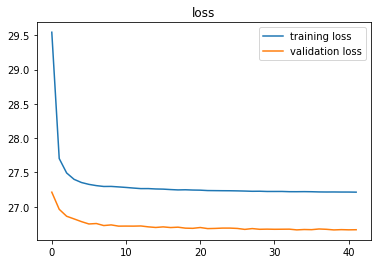

Plotting metrics...


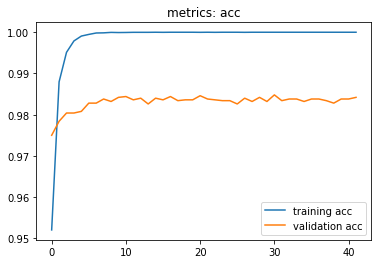

train {'acc': 0.99987274}
test {'acc': 0.9836}

Training student with temperature = 10 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 100 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3116647706346155394
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 8239749659656107401
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.2991157 , acc = 0.37 
Epoch 1 , step 100 , loss= 0.21597837 , acc = 0.95 
Epoch 1 , step 200 , loss= 0.2288569 , acc = 0.95 
Epoch 1 , step 300 , loss= 0.07626919 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.17376803 , acc = 0.96 
Epoch 1 , step 500 , loss= 0.11680812 , acc = 0.98 
Epoch 1 , step 549 , loss= 0.15325592 val_loss= 0.11127443 , acc = 0.96 val acc = 0.9666 
Epoch 1 finished, loss= 0.2269213 val loss= 0.11127443 ,  acc = 0.95078194 val acc = 0.9666
val_ac

Epoch 17 , step 100 , loss= 0.07669857 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.016961705 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.00096256955 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0031942765 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.10154155 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.029344294 val_loss= 0.121457145 , acc = 1.0 val acc = 0.9794 
Epoch 17 finished, loss= 0.014746234 val loss= 0.121457145 ,  acc = 0.9995635 val acc = 0.9794

Epoch 18 , step 50 , loss= 0.000146308 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0056462972 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00018979136 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0040547466 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0074019935 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.020400481 val_loss= 0.11504546 , acc = 1.0 val acc = 0.979 
Epoch 18 finished, loss= 0.011833013 val loss= 0.11504546 ,  acc = 0.9996544 val acc = 0.979

Epoch 19 , step 0 , loss= 0.00012725424 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.000307825

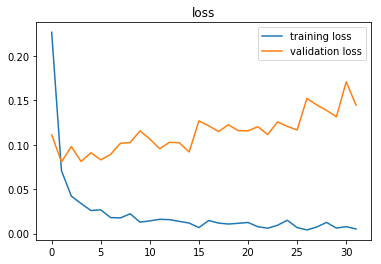

Plotting metrics...


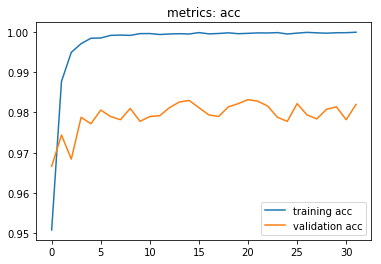

train {'acc': 0.999}
test {'acc': 0.9815}

Training student with temperature = 15 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6286382860258685535
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 857347905217000001
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 518.56396 , acc = 0.34 
Epoch 1 , step 100 , loss= 380.62918 , acc = 0.91 
Epoch 1 , step 200 , loss= 366.33368 , acc = 1.0 
Epoch 1 , step 300 , loss= 362.02762 , acc = 0.95 
Epoch 1 , step 400 , loss= 372.5425 , acc = 0.99 
Epoch 1 , step 500 , loss= 360.79156 , acc = 0.98 
Epoch 1 , step 549 , loss= 365.14676 val_loss= 351.94012 , acc = 0.95 val acc = 0.9724 
Epoch 1 finished, loss= 365.62988 val loss= 351.94012 ,  acc = 0.9427091 val acc = 0.9724
val_acc improved. 
Epo

Epoch 17 , step 549 , loss= 358.41824 val_loss= 349.6331 , acc = 1.0 val acc = 0.982 
Epoch 17 finished, loss= 354.8887 val loss= 349.6331 ,  acc = 0.99701816 val acc = 0.982

Epoch 18 , step 50 , loss= 356.42798 , acc = 1.0 
Epoch 18 , step 150 , loss= 353.90234 , acc = 0.99 
Epoch 18 , step 250 , loss= 351.9777 , acc = 0.99 
Epoch 18 , step 350 , loss= 346.3303 , acc = 1.0 
Epoch 18 , step 450 , loss= 344.2907 , acc = 1.0 
Epoch 18 , step 549 , loss= 329.85355 val_loss= 349.60873 , acc = 1.0 val acc = 0.9818 
Epoch 18 finished, loss= 354.86398 val loss= 349.60873 ,  acc = 0.99725455 val acc = 0.9818

Epoch 19 , step 0 , loss= 362.28983 , acc = 1.0 
Epoch 19 , step 100 , loss= 362.83093 , acc = 1.0 
Epoch 19 , step 200 , loss= 350.8068 , acc = 1.0 
Epoch 19 , step 300 , loss= 371.02777 , acc = 0.99 
Epoch 19 , step 400 , loss= 338.4457 , acc = 0.99 
Epoch 19 , step 500 , loss= 347.38028 , acc = 0.98 
Epoch 19 , step 549 , loss= 359.91644 val_loss= 349.5662 , acc = 1.0 val acc = 0.9838

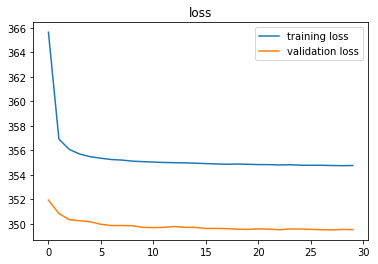

Plotting metrics...


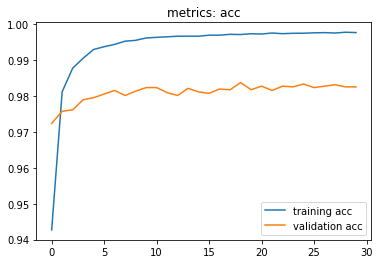

train {'acc': 0.9976182}
test {'acc': 0.983}

Training student with temperature = 15 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10930519695055373592
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 9411262960369726617
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 393.0146 , acc = 0.39 
Epoch 1 , step 100 , loss= 266.98077 , acc = 0.95 
Epoch 1 , step 200 , loss= 275.2472 , acc = 0.95 
Epoch 1 , step 300 , loss= 274.91882 , acc = 0.96 
Epoch 1 , step 400 , loss= 263.9321 , acc = 0.97 
Epoch 1 , step 500 , loss= 262.0237 , acc = 0.97 
Epoch 1 , step 549 , loss= 264.98026 val_loss= 264.13425 , acc = 0.97 val acc = 0.9708 
Epoch 1 finished, loss= 274.3342 val loss= 264.13425 ,  acc = 0.944 val acc = 0.9708
val_acc improved. 
Epo

Epoch 17 , step 549 , loss= 259.4277 val_loss= 262.22614 , acc = 1.0 val acc = 0.9826 
Epoch 17 finished, loss= 266.16772 val loss= 262.22614 ,  acc = 0.9981818 val acc = 0.9826

Epoch 18 , step 50 , loss= 260.3809 , acc = 1.0 
Epoch 18 , step 150 , loss= 243.94885 , acc = 1.0 
Epoch 18 , step 250 , loss= 268.5748 , acc = 1.0 
Epoch 18 , step 350 , loss= 266.82898 , acc = 0.99 
Epoch 18 , step 450 , loss= 261.71643 , acc = 1.0 
Epoch 18 , step 549 , loss= 269.88086 val_loss= 262.20905 , acc = 1.0 val acc = 0.9826 
Epoch 18 finished, loss= 266.172 val loss= 262.20905 ,  acc = 0.998309 val acc = 0.9826

Epoch 19 , step 0 , loss= 269.74414 , acc = 1.0 
Epoch 19 , step 100 , loss= 276.06873 , acc = 1.0 
Epoch 19 , step 200 , loss= 273.53796 , acc = 1.0 
Epoch 19 , step 300 , loss= 261.33533 , acc = 1.0 
Epoch 19 , step 400 , loss= 257.69055 , acc = 1.0 
Epoch 19 , step 500 , loss= 267.93396 , acc = 1.0 
Epoch 19 , step 549 , loss= 249.80342 val_loss= 262.21832 , acc = 1.0 val acc = 0.9812 

Epoch 35 , step 549 , loss= 259.29138 val_loss= 262.13312 , acc = 1.0 val acc = 0.9814 
Epoch 35 finished, loss= 266.04095 val loss= 262.13312 ,  acc = 0.99916357 val acc = 0.9814

Epoch 36 , step 50 , loss= 251.32567 , acc = 1.0 
Epoch 36 , step 150 , loss= 271.69498 , acc = 1.0 
Epoch 36 , step 250 , loss= 260.57205 , acc = 1.0 
Epoch 36 , step 350 , loss= 272.64838 , acc = 1.0 
Epoch 36 , step 450 , loss= 257.26874 , acc = 1.0 
Epoch 36 , step 549 , loss= 269.10788 val_loss= 262.14142 , acc = 1.0 val acc = 0.9818 
Epoch 36 finished, loss= 266.04242 val loss= 262.14142 ,  acc = 0.9991819 val acc = 0.9818

Epoch 37 , step 0 , loss= 264.09695 , acc = 1.0 
Epoch 37 , step 100 , loss= 268.23376 , acc = 1.0 
Epoch 37 , step 200 , loss= 275.79947 , acc = 1.0 
Epoch 37 , step 300 , loss= 282.00607 , acc = 1.0 
Epoch 37 , step 400 , loss= 259.8792 , acc = 1.0 
Epoch 37 , step 500 , loss= 260.88184 , acc = 1.0 
Epoch 37 , step 549 , loss= 263.8519 val_loss= 262.121 , acc = 0.99 val acc = 0.98

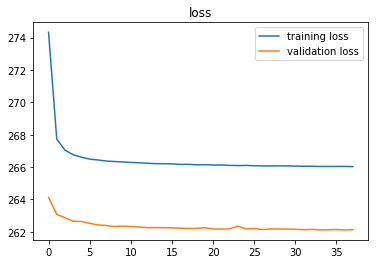

Plotting metrics...


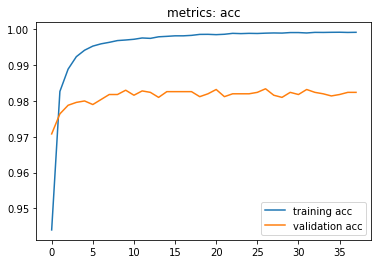

train {'acc': 0.9991636}
test {'acc': 0.9814}

Training student with temperature = 15 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5533701481595787360
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 8128134913029454797
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 263.38913 , acc = 0.33 
Epoch 1 , step 100 , loss= 181.21457 , acc = 0.97 
Epoch 1 , step 200 , loss= 183.3373 , acc = 0.97 
Epoch 1 , step 300 , loss= 167.78511 , acc = 0.95 
Epoch 1 , step 400 , loss= 166.35463 , acc = 0.98 
Epoch 1 , step 500 , loss= 180.37569 , acc = 0.99 
Epoch 1 , step 549 , loss= 182.4698 val_loss= 176.08784 , acc = 0.98 val acc = 0.97 
Epoch 1 finished, loss= 183.01932 val loss= 176.08784 ,  acc = 0.94556373 val acc = 0.97
val_acc improved. 
E

Epoch 17 , step 549 , loss= 179.12442 val_loss= 174.85452 , acc = 1.0 val acc = 0.9836 
Epoch 17 finished, loss= 177.45773 val loss= 174.85452 ,  acc = 0.99949086 val acc = 0.9836

Epoch 18 , step 50 , loss= 175.75963 , acc = 1.0 
Epoch 18 , step 150 , loss= 177.26906 , acc = 1.0 
Epoch 18 , step 250 , loss= 175.7797 , acc = 1.0 
Epoch 18 , step 350 , loss= 180.91496 , acc = 1.0 
Epoch 18 , step 450 , loss= 180.80367 , acc = 1.0 
Epoch 18 , step 549 , loss= 181.60905 val_loss= 174.87541 , acc = 1.0 val acc = 0.9816 
Epoch 18 finished, loss= 177.44273 val loss= 174.87541 ,  acc = 0.99950904 val acc = 0.9816

Epoch 19 , step 0 , loss= 173.50018 , acc = 1.0 
Epoch 19 , step 100 , loss= 175.7294 , acc = 1.0 
Epoch 19 , step 200 , loss= 187.29974 , acc = 1.0 
Epoch 19 , step 300 , loss= 170.3087 , acc = 1.0 
Epoch 19 , step 400 , loss= 170.83371 , acc = 1.0 
Epoch 19 , step 500 , loss= 168.02872 , acc = 1.0 
Epoch 19 , step 549 , loss= 171.26566 val_loss= 174.87604 , acc = 1.0 val acc = 0.9

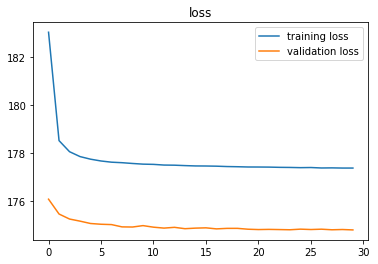

Plotting metrics...


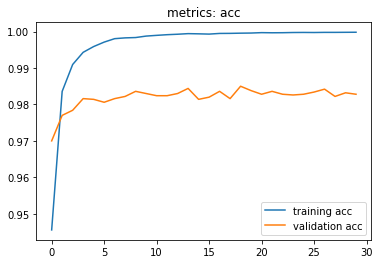

train {'acc': 0.99970907}
test {'acc': 0.9821}

Training student with temperature = 15 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4391952010519710622
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 17801659523228311006
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 136.22798 , acc = 0.45 
Epoch 1 , step 100 , loss= 100.65168 , acc = 0.92 
Epoch 1 , step 200 , loss= 92.64424 , acc = 0.99 
Epoch 1 , step 300 , loss= 94.6894 , acc = 0.97 
Epoch 1 , step 400 , loss= 90.95077 , acc = 0.98 
Epoch 1 , step 500 , loss= 91.78812 , acc = 0.98 
Epoch 1 , step 549 , loss= 92.070465 val_loss= 88.17267 , acc = 0.99 val acc = 0.9738 
Epoch 1 finished, loss= 91.86567 val loss= 88.17267 ,  acc = 0.94974554 val acc = 0.9738
val_acc improved. 

Epoch 18 , step 50 , loss= 89.392555 , acc = 1.0 
Epoch 18 , step 150 , loss= 88.194275 , acc = 1.0 
Epoch 18 , step 250 , loss= 91.35011 , acc = 1.0 
Epoch 18 , step 350 , loss= 85.704636 , acc = 1.0 
Epoch 18 , step 450 , loss= 88.65897 , acc = 1.0 
Epoch 18 , step 549 , loss= 85.756805 val_loss= 87.46646 , acc = 1.0 val acc = 0.983 
Epoch 18 finished, loss= 88.72538 val loss= 87.46646 ,  acc = 0.9999818 val acc = 0.983
val_acc improved. 
Epoch 19 , step 0 , loss= 87.77762 , acc = 1.0 
Epoch 19 , step 100 , loss= 87.13002 , acc = 1.0 
Epoch 19 , step 200 , loss= 85.61705 , acc = 1.0 
Epoch 19 , step 300 , loss= 81.72863 , acc = 1.0 
Epoch 19 , step 400 , loss= 85.98772 , acc = 1.0 
Epoch 19 , step 500 , loss= 89.21819 , acc = 1.0 
Epoch 19 , step 549 , loss= 86.4174 val_loss= 87.470215 , acc = 1.0 val acc = 0.9826 
Epoch 19 finished, loss= 88.720146 val loss= 87.470215 ,  acc = 1.0 val acc = 0.9826

Epoch 20 , step 50 , loss= 95.28898 , acc = 1.0 
Epoch 20 , step 150 , loss= 89.6292 

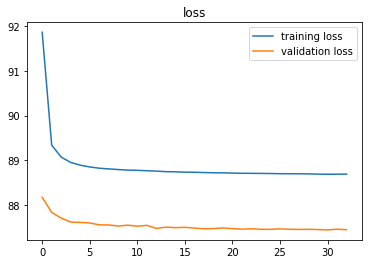

Plotting metrics...


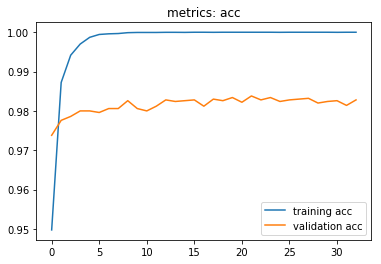

train {'acc': 0.9998364}
test {'acc': 0.9817}

Training student with temperature = 15 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 225 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10789770006015780977
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 16776211020132166431
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.3480587 , acc = 0.34 
Epoch 1 , step 100 , loss= 0.09566465 , acc = 0.99 
Epoch 1 , step 200 , loss= 0.21420427 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.073613204 , acc = 0.99 
Epoch 1 , step 400 , loss= 0.12736279 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.109856516 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.12974735 val_loss= 0.11117053 , acc = 0.97 val acc = 0.966 
Epoch 1 finished, loss= 0.2421928 val loss= 0.11117053 ,  acc = 0.94872725 val acc = 0.966
val_

Epoch 17 , step 100 , loss= 0.014236421 , acc = 1.0 
Epoch 17 , step 200 , loss= 7.318498e-05 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.00069793465 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.00010630177 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.06085472 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0037653148 val_loss= 0.1254803 , acc = 1.0 val acc = 0.9782 
Epoch 17 finished, loss= 0.012810691 val loss= 0.1254803 ,  acc = 0.99954545 val acc = 0.9782

Epoch 18 , step 50 , loss= 0.00021055997 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.064789385 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00030324992 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.014534478 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.052891444 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0060125226 val_loss= 0.106025584 , acc = 1.0 val acc = 0.9822 
Epoch 18 finished, loss= 0.013292902 val loss= 0.106025584 ,  acc = 0.9996727 val acc = 0.9822

Epoch 19 , step 0 , loss= 0.0016071127 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.000841

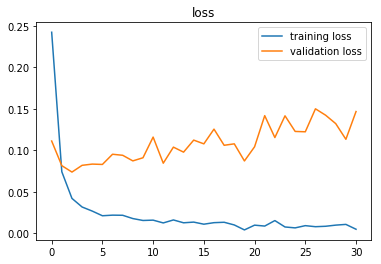

Plotting metrics...


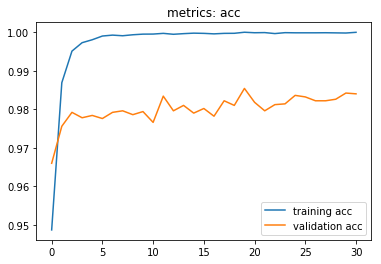

train {'acc': 0.9984}
test {'acc': 0.9803}

Training student with temperature = 20 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3571560178239763423
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6372789453
locality {
  bus_id: 1
}
incarnation: 6828791225798343078
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 918.65656 , acc = 0.43 
Epoch 1 , step 100 , loss= 767.11426 , acc = 0.94 
Epoch 1 , step 200 , loss= 789.4999 , acc = 0.94 
Epoch 1 , step 300 , loss= 736.8612 , acc = 0.98 
Epoch 1 , step 400 , loss= 744.6955 , acc = 0.94 
Epoch 1 , step 500 , loss= 724.8888 , acc = 0.98 
Epoch 1 , step 549 , loss= 744.3199 val_loss= 737.7528 , acc = 0.98 val acc = 0.9706 
Epoch 1 finished, loss= 753.79083 val loss= 737.7528 ,  acc = 0.94060004 val acc = 0.9706
val_acc improved. 
Epoch

Epoch 18 , step 50 , loss= 752.2699 , acc = 0.99 
Epoch 18 , step 150 , loss= 763.90173 , acc = 0.99 
Epoch 18 , step 250 , loss= 730.97424 , acc = 1.0 
Epoch 18 , step 350 , loss= 730.0936 , acc = 1.0 
Epoch 18 , step 450 , loss= 734.5151 , acc = 1.0 
Epoch 18 , step 549 , loss= 744.02606 val_loss= 735.127 , acc = 0.99 val acc = 0.9814 
Epoch 18 finished, loss= 741.78973 val loss= 735.127 ,  acc = 0.997 val acc = 0.9814

Epoch 19 , step 0 , loss= 751.151 , acc = 0.99 
Epoch 19 , step 100 , loss= 731.3832 , acc = 1.0 
Epoch 19 , step 200 , loss= 758.7042 , acc = 1.0 
Epoch 19 , step 300 , loss= 743.96716 , acc = 0.98 
Epoch 19 , step 400 , loss= 735.6972 , acc = 1.0 
Epoch 19 , step 500 , loss= 760.90515 , acc = 1.0 
Epoch 19 , step 549 , loss= 733.6059 val_loss= 735.1245 , acc = 1.0 val acc = 0.9814 
Epoch 19 finished, loss= 741.7761 val loss= 735.1245 ,  acc = 0.99692726 val acc = 0.9814

Epoch 20 , step 50 , loss= 761.58813 , acc = 1.0 
Epoch 20 , step 150 , loss= 723.698 , acc = 0.

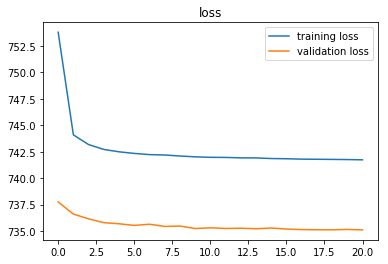

Plotting metrics...


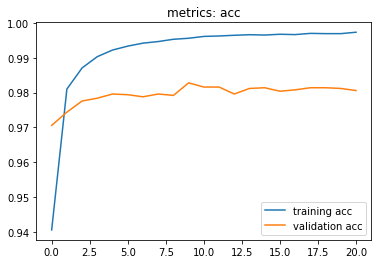

train {'acc': 0.9973636}
test {'acc': 0.9824}

Training student with temperature = 20 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10009846781532788068
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 9194181145041192855
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 693.1693 , acc = 0.42 
Epoch 1 , step 100 , loss= 560.2278 , acc = 0.92 
Epoch 1 , step 200 , loss= 574.13367 , acc = 0.92 
Epoch 1 , step 300 , loss= 541.5326 , acc = 0.99 
Epoch 1 , step 400 , loss= 561.45135 , acc = 0.96 
Epoch 1 , step 500 , loss= 555.1813 , acc = 0.97 
Epoch 1 , step 549 , loss= 569.7261 val_loss= 553.45905 , acc = 1.0 val acc = 0.971 
Epoch 1 finished, loss= 565.53394 val loss= 553.45905 ,  acc = 0.94119996 val acc = 0.971
val_acc improved. 


Student performance with {'coef_softloss': 0.75, 'coef_hardloss': 0.25, 'temperature': 20, 'temperature_effect': 400, 'train_acc': 0.9982909, 'test_acc': 0.9834}
Plotting loss...


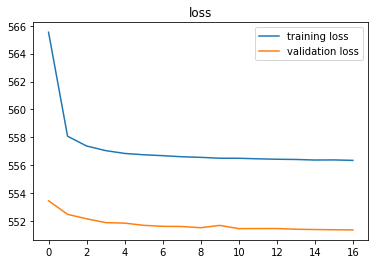

Plotting metrics...


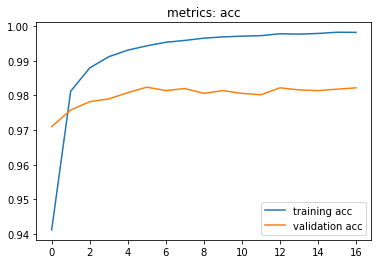

train {'acc': 0.9982909}
test {'acc': 0.9834}

Training student with temperature = 20 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17088651188489093444
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 2414028441274092874
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 465.74112 , acc = 0.3 
Epoch 1 , step 100 , loss= 381.3298 , acc = 0.93 
Epoch 1 , step 200 , loss= 382.39587 , acc = 0.97 
Epoch 1 , step 300 , loss= 380.18527 , acc = 0.98 
Epoch 1 , step 400 , loss= 382.31027 , acc = 0.96 
Epoch 1 , step 500 , loss= 362.11636 , acc = 0.98 
Epoch 1 , step 549 , loss= 366.23633 val_loss= 369.12375 , acc = 0.99 val acc = 0.9706 
Epoch 1 finished, loss= 377.2093 val loss= 369.12375 ,  acc = 0.9434364 val acc = 0.9706
val_acc improved.

Epoch 17 , step 549 , loss= 371.34 val_loss= 367.6269 , acc = 1.0 val acc = 0.9832 
Epoch 17 finished, loss= 370.9174 val loss= 367.6269 ,  acc = 0.9993273 val acc = 0.9832

Epoch 18 , step 50 , loss= 363.57187 , acc = 1.0 
Epoch 18 , step 150 , loss= 359.65387 , acc = 1.0 
Epoch 18 , step 250 , loss= 379.93625 , acc = 1.0 
Epoch 18 , step 350 , loss= 381.98352 , acc = 1.0 
Epoch 18 , step 450 , loss= 377.1684 , acc = 1.0 
Epoch 18 , step 549 , loss= 376.86716 val_loss= 367.6337 , acc = 1.0 val acc = 0.9818 
Epoch 18 finished, loss= 370.89313 val loss= 367.6337 ,  acc = 0.99954545 val acc = 0.9818

Epoch 19 , step 0 , loss= 370.4991 , acc = 1.0 
Epoch 19 , step 100 , loss= 384.09595 , acc = 1.0 
Epoch 19 , step 200 , loss= 370.96378 , acc = 1.0 
Epoch 19 , step 300 , loss= 373.59018 , acc = 1.0 
Epoch 19 , step 400 , loss= 368.58844 , acc = 1.0 
Epoch 19 , step 500 , loss= 360.26868 , acc = 1.0 
Epoch 19 , step 549 , loss= 366.3409 val_loss= 367.63443 , acc = 1.0 val acc = 0.9834 
Epoc

Epoch 35 , step 549 , loss= 377.56845 val_loss= 367.54523 , acc = 1.0 val acc = 0.9832 
Epoch 35 finished, loss= 370.7995 val loss= 367.54523 ,  acc = 0.9998545 val acc = 0.9832

Epoch 36 , step 50 , loss= 360.30087 , acc = 1.0 
Epoch 36 , step 150 , loss= 363.97324 , acc = 1.0 
Epoch 36 , step 250 , loss= 367.7782 , acc = 1.0 
Epoch 36 , step 350 , loss= 364.7591 , acc = 1.0 
Epoch 36 , step 450 , loss= 369.51114 , acc = 1.0 
Epoch 36 , step 549 , loss= 359.6292 val_loss= 367.538 , acc = 1.0 val acc = 0.9814 
Epoch 36 finished, loss= 370.80573 val loss= 367.538 ,  acc = 0.9998181 val acc = 0.9814

Epoch 37 , step 0 , loss= 378.7947 , acc = 1.0 
Epoch 37 , step 100 , loss= 373.4656 , acc = 1.0 
Epoch 37 , step 200 , loss= 376.97723 , acc = 1.0 
Epoch 37 , step 300 , loss= 354.97345 , acc = 1.0 
Epoch 37 , step 400 , loss= 355.59366 , acc = 1.0 
Epoch 37 , step 500 , loss= 369.4329 , acc = 1.0 
Epoch 37 , step 549 , loss= 363.3633 val_loss= 367.54398 , acc = 1.0 val acc = 0.9826 
Epoch 

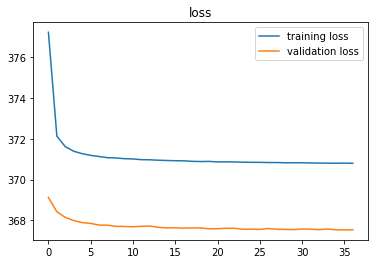

Plotting metrics...


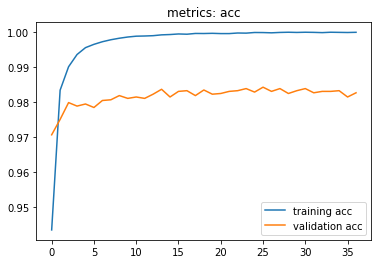

train {'acc': 0.99985456}
test {'acc': 0.9816}

Training student with temperature = 20 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14166158672269702259
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 15250337773777897252
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 234.75237 , acc = 0.38 
Epoch 1 , step 100 , loss= 183.7521 , acc = 0.95 
Epoch 1 , step 200 , loss= 190.04146 , acc = 0.94 
Epoch 1 , step 300 , loss= 189.3537 , acc = 0.97 
Epoch 1 , step 400 , loss= 189.7311 , acc = 0.98 
Epoch 1 , step 500 , loss= 182.87985 , acc = 0.98 
Epoch 1 , step 549 , loss= 187.815 val_loss= 184.63 , acc = 0.99 val acc = 0.971 
Epoch 1 finished, loss= 188.92656 val loss= 184.63 ,  acc = 0.9478183 val acc = 0.971
val_acc improved. 
Epoc

Epoch 18 , step 50 , loss= 180.76195 , acc = 1.0 
Epoch 18 , step 150 , loss= 190.23483 , acc = 1.0 
Epoch 18 , step 250 , loss= 187.55832 , acc = 1.0 
Epoch 18 , step 350 , loss= 186.53448 , acc = 1.0 
Epoch 18 , step 450 , loss= 179.48734 , acc = 1.0 
Epoch 18 , step 549 , loss= 179.05573 val_loss= 183.87337 , acc = 1.0 val acc = 0.9816 
Epoch 18 finished, loss= 185.45857 val loss= 183.87337 ,  acc = 0.9999818 val acc = 0.9816

Epoch 19 , step 0 , loss= 193.28859 , acc = 1.0 
Epoch 19 , step 100 , loss= 181.61894 , acc = 1.0 
Epoch 19 , step 200 , loss= 179.18741 , acc = 1.0 
Epoch 19 , step 300 , loss= 188.38873 , acc = 1.0 
Epoch 19 , step 400 , loss= 189.03525 , acc = 1.0 
Epoch 19 , step 500 , loss= 191.26158 , acc = 1.0 
Epoch 19 , step 549 , loss= 177.40207 val_loss= 183.83633 , acc = 1.0 val acc = 0.9826 
Epoch 19 finished, loss= 185.4492 val loss= 183.83633 ,  acc = 1.0 val acc = 0.9826

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coe

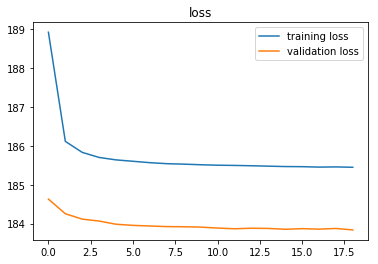

Plotting metrics...


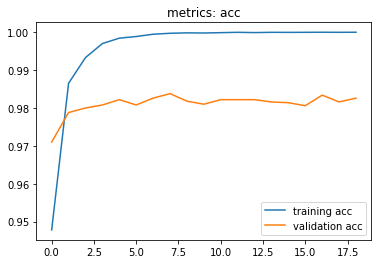

train {'acc': 0.99994546}
test {'acc': 0.9824}

Training student with temperature = 20 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 400 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12929729731943967613
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 11882941648835746768
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 3.9434195 , acc = 0.33 
Epoch 1 , step 100 , loss= 0.12829435 , acc = 0.97 
Epoch 1 , step 200 , loss= 0.289603 , acc = 0.91 
Epoch 1 , step 300 , loss= 0.19953081 , acc = 0.94 
Epoch 1 , step 400 , loss= 0.07150318 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.1007044 , acc = 0.97 
Epoch 1 , step 549 , loss= 0.113691375 val_loss= 0.11566306 , acc = 0.97 val acc = 0.9646 
Epoch 1 finished, loss= 0.24594061 val loss= 0.11566306 ,  acc = 0.9482727 val acc = 0.9646
val_a

Epoch 17 , step 100 , loss= 0.0080799125 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.0061197914 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.0007019295 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.16364174 , acc = 0.98 
Epoch 17 , step 500 , loss= 0.06426795 , acc = 0.99 
Epoch 17 , step 549 , loss= 0.00019934912 val_loss= 0.09863254 , acc = 1.0 val acc = 0.983 
Epoch 17 finished, loss= 0.010917269 val loss= 0.09863254 ,  acc = 0.99963635 val acc = 0.983
val_acc improved. 
Epoch 18 , step 50 , loss= 8.426639e-05 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.00014744412 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.0005161119 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.000598771 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.010415617 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.004454679 val_loss= 0.12399917 , acc = 1.0 val acc = 0.98 
Epoch 18 finished, loss= 0.010713848 val loss= 0.12399917 ,  acc = 0.99963635 val acc = 0.98

Epoch 19 , step 0 , loss= 0.0002961598 , acc = 1.0 
Epoch 19 , step 100 , lo

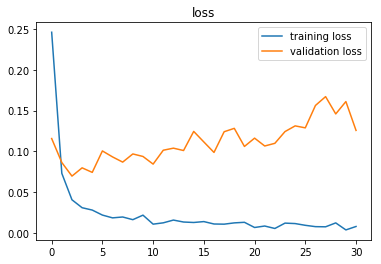

Plotting metrics...


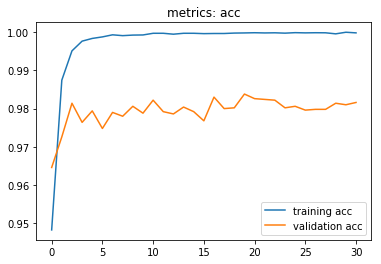

train {'acc': 0.9994909}
test {'acc': 0.9817}

Training student with temperature = 25 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 625 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16570870660275595771
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 13249396149491807143
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 1441.5997 , acc = 0.17 
Epoch 1 , step 100 , loss= 1283.6819 , acc = 0.93 
Epoch 1 , step 200 , loss= 1274.3004 , acc = 0.92 
Epoch 1 , step 300 , loss= 1236.4885 , acc = 0.97 
Epoch 1 , step 400 , loss= 1244.8395 , acc = 0.95 
Epoch 1 , step 500 , loss= 1286.4255 , acc = 0.96 
Epoch 1 , step 549 , loss= 1241.4043 val_loss= 1252.6147 , acc = 0.98 val acc = 0.9684 
Epoch 1 finished, loss= 1269.403 val loss= 1252.6147 ,  acc = 0.9379454 val acc = 0.9684
val_acc improv

Epoch 17 , step 500 , loss= 1283.0708 , acc = 1.0 
Epoch 17 , step 549 , loss= 1216.6523 val_loss= 1249.7896 , acc = 1.0 val acc = 0.9818 
Epoch 17 finished, loss= 1256.8566 val loss= 1249.7896 ,  acc = 0.996709 val acc = 0.9818

Epoch 18 , step 50 , loss= 1263.0934 , acc = 1.0 
Epoch 18 , step 150 , loss= 1257.792 , acc = 1.0 
Epoch 18 , step 250 , loss= 1253.2645 , acc = 1.0 
Epoch 18 , step 350 , loss= 1275.7423 , acc = 1.0 
Epoch 18 , step 450 , loss= 1245.6547 , acc = 1.0 
Epoch 18 , step 549 , loss= 1268.6328 val_loss= 1249.7831 , acc = 1.0 val acc = 0.9824 
Epoch 18 finished, loss= 1256.8523 val loss= 1249.7831 ,  acc = 0.9970546 val acc = 0.9824
val_acc improved. 
Epoch 19 , step 0 , loss= 1264.674 , acc = 1.0 
Epoch 19 , step 100 , loss= 1275.4172 , acc = 1.0 
Epoch 19 , step 200 , loss= 1229.6279 , acc = 1.0 
Epoch 19 , step 300 , loss= 1251.9746 , acc = 1.0 
Epoch 19 , step 400 , loss= 1201.8384 , acc = 1.0 
Epoch 19 , step 500 , loss= 1244.5745 , acc = 0.98 
Epoch 19 , step

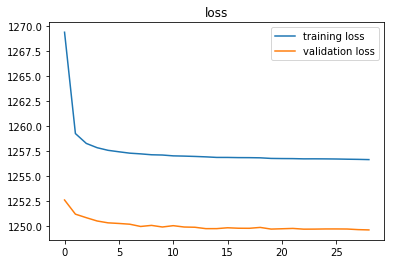

Plotting metrics...


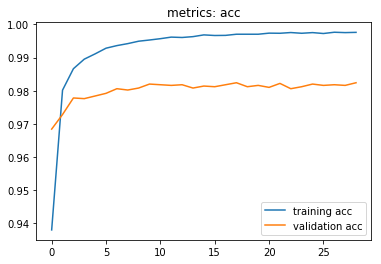

train {'acc': 0.9978909}
test {'acc': 0.9831}

Training student with temperature = 25 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 625 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5025893341485499711
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 17502485074466068301
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 1086.3481 , acc = 0.31 
Epoch 1 , step 100 , loss= 943.6454 , acc = 0.95 
Epoch 1 , step 200 , loss= 973.26697 , acc = 1.0 
Epoch 1 , step 300 , loss= 971.1422 , acc = 0.94 
Epoch 1 , step 400 , loss= 956.9847 , acc = 1.0 
Epoch 1 , step 500 , loss= 952.03766 , acc = 0.99 
Epoch 1 , step 549 , loss= 936.41016 val_loss= 939.7161 , acc = 0.99 val acc = 0.9698 
Epoch 1 finished, loss= 952.2752 val loss= 939.7161 ,  acc = 0.9401273 val acc = 0.9698
val_acc improved. 
E

Epoch 17 , step 549 , loss= 927.82306 val_loss= 937.3876 , acc = 1.0 val acc = 0.981 
Epoch 17 finished, loss= 942.65704 val loss= 937.3876 ,  acc = 0.9980726 val acc = 0.981

Epoch 18 , step 50 , loss= 944.2754 , acc = 1.0 
Epoch 18 , step 150 , loss= 925.90497 , acc = 1.0 
Epoch 18 , step 250 , loss= 945.7815 , acc = 1.0 
Epoch 18 , step 350 , loss= 945.821 , acc = 1.0 
Epoch 18 , step 450 , loss= 944.0708 , acc = 1.0 
Epoch 18 , step 549 , loss= 944.27325 val_loss= 937.34106 , acc = 1.0 val acc = 0.9816 
Epoch 18 finished, loss= 942.6378 val loss= 937.34106 ,  acc = 0.9981454 val acc = 0.9816

Epoch 19 , step 0 , loss= 952.2554 , acc = 1.0 
Epoch 19 , step 100 , loss= 934.82806 , acc = 1.0 
Epoch 19 , step 200 , loss= 938.1599 , acc = 1.0 
Epoch 19 , step 300 , loss= 957.60785 , acc = 1.0 
Epoch 19 , step 400 , loss= 932.57794 , acc = 0.99 
Epoch 19 , step 500 , loss= 953.59283 , acc = 1.0 
Epoch 19 , step 549 , loss= 942.5408 val_loss= 937.3257 , acc = 1.0 val acc = 0.9812 
Epoch 1

Epoch 36 , step 50 , loss= 942.0617 , acc = 1.0 
Epoch 36 , step 150 , loss= 966.3009 , acc = 1.0 
Epoch 36 , step 250 , loss= 961.13916 , acc = 1.0 
Epoch 36 , step 350 , loss= 961.59045 , acc = 1.0 
Epoch 36 , step 450 , loss= 974.4212 , acc = 1.0 
Epoch 36 , step 549 , loss= 944.0107 val_loss= 937.21173 , acc = 1.0 val acc = 0.9822 
Epoch 36 finished, loss= 942.45074 val loss= 937.21173 ,  acc = 0.9992909 val acc = 0.9822

Epoch 37 , step 0 , loss= 951.1404 , acc = 1.0 
Epoch 37 , step 100 , loss= 962.66156 , acc = 1.0 
Epoch 37 , step 200 , loss= 946.89307 , acc = 1.0 
Epoch 37 , step 300 , loss= 966.176 , acc = 1.0 
Epoch 37 , step 400 , loss= 959.896 , acc = 1.0 
Epoch 37 , step 500 , loss= 941.92896 , acc = 1.0 
Epoch 37 , step 549 , loss= 921.3569 val_loss= 937.23724 , acc = 1.0 val acc = 0.9814 
Epoch 37 finished, loss= 942.4641 val loss= 937.23724 ,  acc = 0.9991454 val acc = 0.9814

Epoch 38 , step 50 , loss= 930.41876 , acc = 1.0 
Epoch 38 , step 150 , loss= 948.9493 , acc 

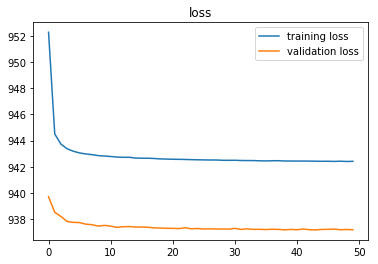

Plotting metrics...


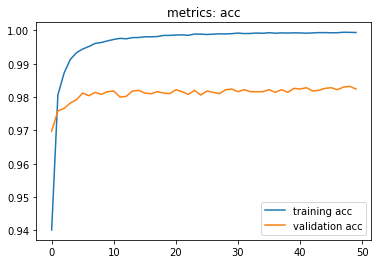

train {'acc': 0.9992909}
test {'acc': 0.9816}

Training student with temperature = 25 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 625 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14008360416945091431
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 14978925753475404944
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 722.06726 , acc = 0.45 
Epoch 1 , step 100 , loss= 645.9283 , acc = 0.96 
Epoch 1 , step 200 , loss= 628.2587 , acc = 0.95 
Epoch 1 , step 300 , loss= 630.51794 , acc = 0.96 
Epoch 1 , step 400 , loss= 631.40393 , acc = 0.95 
Epoch 1 , step 500 , loss= 622.52795 , acc = 0.98 
Epoch 1 , step 549 , loss= 642.005 val_loss= 626.45166 , acc = 0.98 val acc = 0.9682 
Epoch 1 finished, loss= 634.99066 val loss= 626.45166 ,  acc = 0.942491 val acc = 0.9682
val_acc improved. 

Epoch 17 , step 549 , loss= 623.6569 val_loss= 624.91223 , acc = 1.0 val acc = 0.9802 
Epoch 17 finished, loss= 628.4267 val loss= 624.91223 ,  acc = 0.99956363 val acc = 0.9802

Epoch 18 , step 50 , loss= 624.37305 , acc = 1.0 
Epoch 18 , step 150 , loss= 624.1339 , acc = 1.0 
Epoch 18 , step 250 , loss= 622.9653 , acc = 1.0 
Epoch 18 , step 350 , loss= 613.5756 , acc = 1.0 
Epoch 18 , step 450 , loss= 635.20264 , acc = 1.0 
Epoch 18 , step 549 , loss= 630.36176 val_loss= 624.94257 , acc = 1.0 val acc = 0.9808 
Epoch 18 finished, loss= 628.4178 val loss= 624.94257 ,  acc = 0.99958175 val acc = 0.9808

Epoch 19 , step 0 , loss= 613.4171 , acc = 1.0 
Epoch 19 , step 100 , loss= 608.58325 , acc = 1.0 
Epoch 19 , step 200 , loss= 637.10187 , acc = 1.0 
Epoch 19 , step 300 , loss= 620.7405 , acc = 1.0 
Epoch 19 , step 400 , loss= 633.5429 , acc = 1.0 
Epoch 19 , step 500 , loss= 626.5711 , acc = 1.0 
Epoch 19 , step 549 , loss= 617.631 val_loss= 624.8972 , acc = 1.0 val acc = 0.981 
Epoch 

Epoch 35 , step 549 , loss= 613.43097 val_loss= 624.8492 , acc = 1.0 val acc = 0.9812 
Epoch 35 finished, loss= 628.31635 val loss= 624.8492 ,  acc = 0.9998726 val acc = 0.9812

Epoch 36 , step 50 , loss= 623.24634 , acc = 1.0 
Epoch 36 , step 150 , loss= 630.69305 , acc = 1.0 
Epoch 36 , step 250 , loss= 613.536 , acc = 1.0 
Epoch 36 , step 350 , loss= 615.03894 , acc = 1.0 
Epoch 36 , step 450 , loss= 624.36194 , acc = 1.0 
Epoch 36 , step 549 , loss= 633.60455 val_loss= 624.8589 , acc = 1.0 val acc = 0.9812 
Epoch 36 finished, loss= 628.3041 val loss= 624.8589 ,  acc = 0.9998908 val acc = 0.9812

Epoch 37 , step 0 , loss= 611.76105 , acc = 1.0 
Epoch 37 , step 100 , loss= 614.2156 , acc = 1.0 
Epoch 37 , step 200 , loss= 617.0599 , acc = 1.0 
Epoch 37 , step 300 , loss= 631.74866 , acc = 1.0 
Epoch 37 , step 400 , loss= 626.3738 , acc = 0.99 
Epoch 37 , step 500 , loss= 634.1372 , acc = 1.0 
Epoch 37 , step 549 , loss= 614.96313 val_loss= 624.84033 , acc = 1.0 val acc = 0.9818 
Epoc

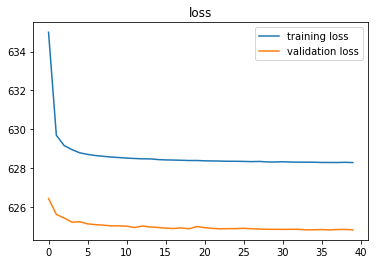

Plotting metrics...


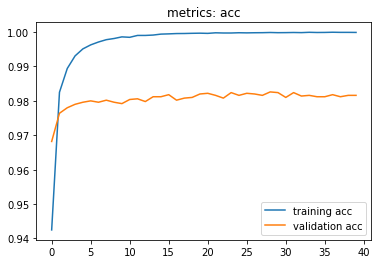

train {'acc': 0.9998182}
test {'acc': 0.9814}

Training student with temperature = 25 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 625 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11623716059682350340
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 17354822476922435522
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 364.05542 , acc = 0.49 
Epoch 1 , step 100 , loss= 319.24985 , acc = 0.96 
Epoch 1 , step 200 , loss= 313.97568 , acc = 0.95 
Epoch 1 , step 300 , loss= 308.55966 , acc = 0.97 
Epoch 1 , step 400 , loss= 311.22427 , acc = 0.98 
Epoch 1 , step 500 , loss= 318.22736 , acc = 0.98 
Epoch 1 , step 549 , loss= 318.04773 val_loss= 313.3004 , acc = 0.97 val acc = 0.9698 
Epoch 1 finished, loss= 317.7528 val loss= 313.3004 ,  acc = 0.9480909 val acc = 0.9698
val_acc improv

Epoch 18 , step 50 , loss= 308.33813 , acc = 1.0 
Epoch 18 , step 150 , loss= 317.33255 , acc = 1.0 
Epoch 18 , step 250 , loss= 311.90677 , acc = 1.0 
Epoch 18 , step 350 , loss= 310.3428 , acc = 1.0 
Epoch 18 , step 450 , loss= 310.33942 , acc = 1.0 
Epoch 18 , step 549 , loss= 319.699 val_loss= 312.5038 , acc = 1.0 val acc = 0.983 
Epoch 18 finished, loss= 314.21317 val loss= 312.5038 ,  acc = 1.0 val acc = 0.983

Epoch 19 , step 0 , loss= 306.68253 , acc = 1.0 
Epoch 19 , step 100 , loss= 312.17844 , acc = 1.0 
Epoch 19 , step 200 , loss= 309.974 , acc = 1.0 
Epoch 19 , step 300 , loss= 309.84644 , acc = 1.0 
Epoch 19 , step 400 , loss= 314.1802 , acc = 1.0 
Epoch 19 , step 500 , loss= 320.48413 , acc = 1.0 
Epoch 19 , step 549 , loss= 316.2385 val_loss= 312.5149 , acc = 1.0 val acc = 0.9828 
Epoch 19 finished, loss= 314.2061 val loss= 312.5149 ,  acc = 1.0 val acc = 0.9828

Epoch 20 , step 50 , loss= 313.8905 , acc = 1.0 
Epoch 20 , step 150 , loss= 315.90286 , acc = 1.0 
Epoch 20

Epoch 36 , step 250 , loss= 314.8859 , acc = 1.0 
Epoch 36 , step 350 , loss= 317.37927 , acc = 1.0 
Epoch 36 , step 450 , loss= 318.47122 , acc = 1.0 
Epoch 36 , step 549 , loss= 317.6807 val_loss= 312.46414 , acc = 1.0 val acc = 0.9832 
Epoch 36 finished, loss= 314.1552 val loss= 312.46414 ,  acc = 1.0 val acc = 0.9832

Epoch 37 , step 0 , loss= 310.21204 , acc = 1.0 
Epoch 37 , step 100 , loss= 309.7449 , acc = 1.0 
Epoch 37 , step 200 , loss= 322.6016 , acc = 1.0 
Epoch 37 , step 300 , loss= 312.94376 , acc = 1.0 
Epoch 37 , step 400 , loss= 309.45734 , acc = 1.0 
Epoch 37 , step 500 , loss= 313.04202 , acc = 1.0 
Epoch 37 , step 549 , loss= 317.09467 val_loss= 312.47882 , acc = 1.0 val acc = 0.9824 
Epoch 37 finished, loss= 314.15292 val loss= 312.47882 ,  acc = 1.0 val acc = 0.9824

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 0.25, 'coef_hardloss': 0.75, 'temperature': 25, 'temperature_effect': 625, 'train_acc': 0.9999818,

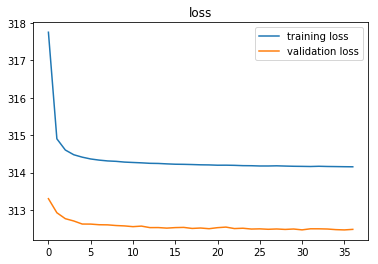

Plotting metrics...


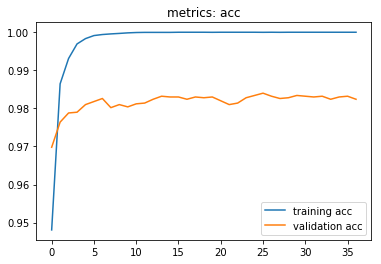

train {'acc': 0.9999818}
test {'acc': 0.9831}

Training student with temperature = 25 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 625 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 626212602096140368
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 8804998083336115511
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.8707595 , acc = 0.32 
Epoch 1 , step 100 , loss= 0.27982676 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.21450382 , acc = 0.96 
Epoch 1 , step 300 , loss= 0.3170383 , acc = 0.95 
Epoch 1 , step 400 , loss= 0.10479422 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.09664366 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.07988104 val_loss= 0.10964392 , acc = 0.98 val acc = 0.9654 
Epoch 1 finished, loss= 0.24164002 val loss= 0.10964392 ,  acc = 0.94978184 val acc = 0.9654
val_acc

Epoch 17 , step 100 , loss= 0.0015892613 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.09351799 , acc = 1.0 
Epoch 17 , step 300 , loss= 2.0940714e-05 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.0013393849 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0030441792 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.00069367734 val_loss= 0.10905547 , acc = 1.0 val acc = 0.979 
Epoch 17 finished, loss= 0.011323109 val loss= 0.10905547 ,  acc = 0.9998182 val acc = 0.979

Epoch 18 , step 50 , loss= 0.00028793444 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0003001386 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.00022262271 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0002929893 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.000508784 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.00016273094 val_loss= 0.11082943 , acc = 1.0 val acc = 0.9812 
Epoch 18 finished, loss= 0.010869912 val loss= 0.11082943 ,  acc = 0.999709 val acc = 0.9812

Epoch 19 , step 0 , loss= 0.0040849303 , acc = 1.0 
Epoch 19 , step 100 , loss= 6.84011e

Epoch 34 , step 50 , loss= 0.00038789786 , acc = 1.0 
Epoch 34 , step 150 , loss= 1.5486545e-05 , acc = 1.0 
Epoch 34 , step 250 , loss= 6.7899906e-05 , acc = 1.0 
Epoch 34 , step 350 , loss= 3.972287e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 9.7437034e-05 , acc = 1.0 
Epoch 34 , step 549 , loss= 1.02463455e-05 val_loss= 0.12247624 , acc = 1.0 val acc = 0.9826 
Epoch 34 finished, loss= 0.002721398 val loss= 0.12247624 ,  acc = 0.9999636 val acc = 0.9826

Epoch 35 , step 0 , loss= 3.7707578e-05 , acc = 1.0 
Epoch 35 , step 100 , loss= 1.3415585e-05 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.0003502988 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.00025063084 , acc = 1.0 
Epoch 35 , step 400 , loss= 5.9418926e-06 , acc = 1.0 
Epoch 35 , step 500 , loss= 1.4372895e-05 , acc = 1.0 
Epoch 35 , step 549 , loss= 2.200478e-06 val_loss= 0.10175014 , acc = 1.0 val acc = 0.986 
Epoch 35 finished, loss= 0.0030069 val loss= 0.10175014 ,  acc = 0.9999636 val acc = 0.986
val_acc improved. 
Epoch 36 ,

Student performance with {'coef_softloss': 0.0, 'coef_hardloss': 1.0, 'temperature': 25, 'temperature_effect': 625, 'train_acc': 0.9985273, 'test_acc': 0.9807}
Plotting loss...


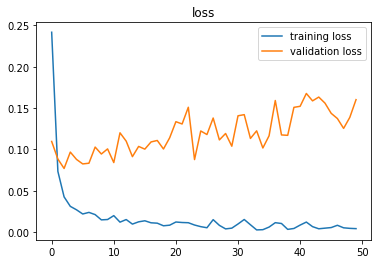

Plotting metrics...


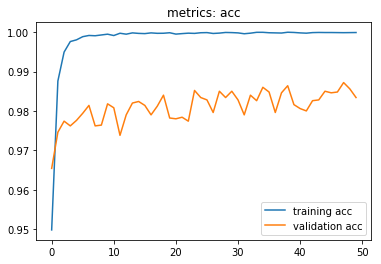

train {'acc': 0.9985273}
test {'acc': 0.9807}

Training student with temperature = 30 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 900 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2341460485617050185
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 13153264249934435019
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2077.418 , acc = 0.42 
Epoch 1 , step 100 , loss= 1929.5608 , acc = 0.93 
Epoch 1 , step 200 , loss= 1887.757 , acc = 0.95 
Epoch 1 , step 300 , loss= 1897.8389 , acc = 0.97 
Epoch 1 , step 400 , loss= 1907.7894 , acc = 0.95 
Epoch 1 , step 500 , loss= 1879.4908 , acc = 0.99 
Epoch 1 , step 549 , loss= 1914.2932 val_loss= 1888.2513 , acc = 0.98 val acc = 0.967 
Epoch 1 finished, loss= 1905.2255 val loss= 1888.2513 ,  acc = 0.9383818 val acc = 0.967
val_acc improved. 

Epoch 17 , step 549 , loss= 1882.5736 val_loss= 1885.3127 , acc = 1.0 val acc = 0.9814 
Epoch 17 finished, loss= 1892.39 val loss= 1885.3127 ,  acc = 0.9966182 val acc = 0.9814

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with {'coef_softloss': 1.0, 'coef_hardloss': 0.0, 'temperature': 30, 'temperature_effect': 900, 'train_acc': 0.9966909, 'test_acc': 0.9823}
Plotting loss...


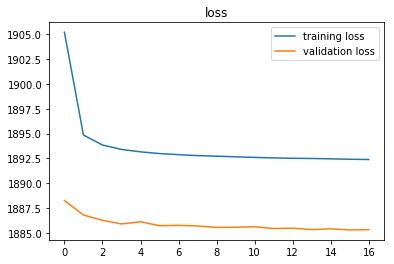

Plotting metrics...


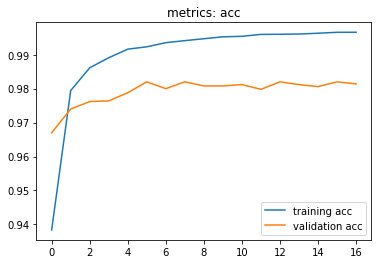

train {'acc': 0.9966909}
test {'acc': 0.9823}

Training student with temperature = 30 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 900 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17190216362417504101
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 15452733988466341627
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 1556.5397 , acc = 0.43 
Epoch 1 , step 100 , loss= 1416.2391 , acc = 0.93 
Epoch 1 , step 200 , loss= 1426.2172 , acc = 0.97 
Epoch 1 , step 300 , loss= 1450.3076 , acc = 0.95 
Epoch 1 , step 400 , loss= 1432.0048 , acc = 0.99 
Epoch 1 , step 500 , loss= 1411.9633 , acc = 0.98 
Epoch 1 , step 549 , loss= 1404.2587 val_loss= 1416.1206 , acc = 1.0 val acc = 0.9678 
Epoch 1 finished, loss= 1429.0464 val loss= 1416.1206 ,  acc = 0.9404181 val acc = 0.9678
val_acc impr

Epoch 17 , step 549 , loss= 1413.0348 val_loss= 1414.0272 , acc = 1.0 val acc = 0.9806 
Epoch 17 finished, loss= 1419.322 val loss= 1414.0272 ,  acc = 0.9981272 val acc = 0.9806

Epoch 18 , step 50 , loss= 1403.83 , acc = 1.0 
Epoch 18 , step 150 , loss= 1412.2743 , acc = 1.0 
Epoch 18 , step 250 , loss= 1447.8219 , acc = 1.0 
Epoch 18 , step 350 , loss= 1418.986 , acc = 1.0 
Epoch 18 , step 450 , loss= 1394.4902 , acc = 1.0 
Epoch 18 , step 549 , loss= 1435.3617 val_loss= 1413.9932 , acc = 1.0 val acc = 0.9808 
Epoch 18 finished, loss= 1419.2926 val loss= 1413.9932 ,  acc = 0.9982908 val acc = 0.9808

Epoch 19 , step 0 , loss= 1414.0378 , acc = 1.0 
Epoch 19 , step 100 , loss= 1414.8762 , acc = 1.0 
Epoch 19 , step 200 , loss= 1426.7319 , acc = 1.0 
Epoch 19 , step 300 , loss= 1444.6152 , acc = 1.0 
Epoch 19 , step 400 , loss= 1407.2766 , acc = 1.0 
Epoch 19 , step 500 , loss= 1451.4836 , acc = 1.0 
Epoch 19 , step 549 , loss= 1420.9277 val_loss= 1413.9952 , acc = 1.0 val acc = 0.9816

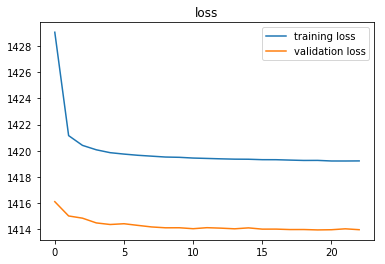

Plotting metrics...


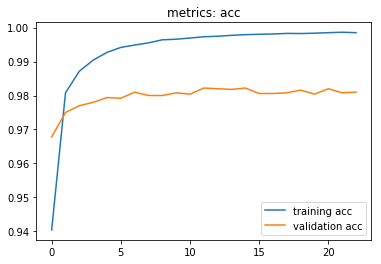

train {'acc': 0.99856365}
test {'acc': 0.9831}

Training student with temperature = 30 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 900 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6602400134352973682
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 8551873084531926770
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 1042.978 , acc = 0.25 
Epoch 1 , step 100 , loss= 966.90094 , acc = 0.95 
Epoch 1 , step 200 , loss= 951.42804 , acc = 0.98 
Epoch 1 , step 300 , loss= 958.57355 , acc = 0.98 
Epoch 1 , step 400 , loss= 942.5466 , acc = 1.0 
Epoch 1 , step 500 , loss= 950.83417 , acc = 0.99 
Epoch 1 , step 549 , loss= 954.1067 val_loss= 944.1427 , acc = 0.96 val acc = 0.9704 
Epoch 1 finished, loss= 953.029 val loss= 944.1427 ,  acc = 0.9408909 val acc = 0.9704
val_acc improved. 
Epo

Epoch 17 , step 549 , loss= 945.81415 val_loss= 942.6818 , acc = 1.0 val acc = 0.9806 
Epoch 17 finished, loss= 946.1912 val loss= 942.6818 ,  acc = 0.99941814 val acc = 0.9806

Epoch 18 , step 50 , loss= 931.34155 , acc = 1.0 
Epoch 18 , step 150 , loss= 948.53766 , acc = 1.0 
Epoch 18 , step 250 , loss= 945.9493 , acc = 1.0 
Epoch 18 , step 350 , loss= 952.4936 , acc = 1.0 
Epoch 18 , step 450 , loss= 963.27454 , acc = 1.0 
Epoch 18 , step 549 , loss= 924.8502 val_loss= 942.67365 , acc = 1.0 val acc = 0.9824 
Epoch 18 finished, loss= 946.20013 val loss= 942.67365 ,  acc = 0.99954545 val acc = 0.9824

Epoch 19 , step 0 , loss= 938.56635 , acc = 1.0 
Epoch 19 , step 100 , loss= 939.01056 , acc = 1.0 
Epoch 19 , step 200 , loss= 933.37006 , acc = 1.0 
Epoch 19 , step 300 , loss= 940.19446 , acc = 1.0 
Epoch 19 , step 400 , loss= 939.3061 , acc = 1.0 
Epoch 19 , step 500 , loss= 932.8523 , acc = 1.0 
Epoch 19 , step 549 , loss= 944.67444 val_loss= 942.64575 , acc = 0.99 val acc = 0.9814 

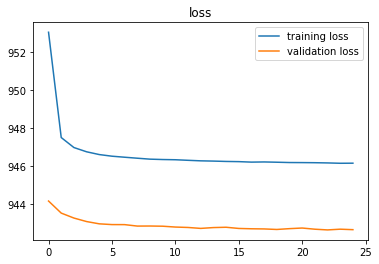

Plotting metrics...


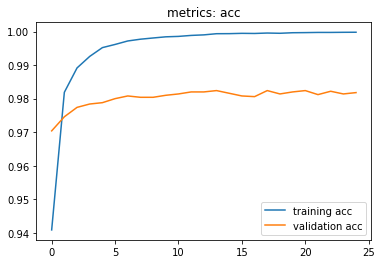

train {'acc': 0.9998}
test {'acc': 0.9832}

Training student with temperature = 30 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 900 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12803779793887103997
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 4406179836203664232
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 520.28424 , acc = 0.53 
Epoch 1 , step 100 , loss= 477.3455 , acc = 0.97 
Epoch 1 , step 200 , loss= 481.35233 , acc = 0.95 
Epoch 1 , step 300 , loss= 470.07745 , acc = 0.98 
Epoch 1 , step 400 , loss= 473.1849 , acc = 0.97 
Epoch 1 , step 500 , loss= 475.0833 , acc = 0.99 
Epoch 1 , step 549 , loss= 477.86508 val_loss= 472.16595 , acc = 0.93 val acc = 0.9716 
Epoch 1 finished, loss= 476.63675 val loss= 472.16595 ,  acc = 0.94939995 val acc = 0.9716
val_acc improved.

Epoch 18 , step 50 , loss= 479.06348 , acc = 1.0 
Epoch 18 , step 150 , loss= 463.3806 , acc = 1.0 
Epoch 18 , step 250 , loss= 481.03433 , acc = 1.0 
Epoch 18 , step 350 , loss= 472.00528 , acc = 1.0 
Epoch 18 , step 450 , loss= 471.27646 , acc = 1.0 
Epoch 18 , step 549 , loss= 477.97076 val_loss= 471.39148 , acc = 1.0 val acc = 0.9808 
Epoch 18 finished, loss= 473.09683 val loss= 471.39148 ,  acc = 0.9999818 val acc = 0.9808

Epoch 19 , step 0 , loss= 470.9563 , acc = 1.0 
Epoch 19 , step 100 , loss= 471.20895 , acc = 1.0 
Epoch 19 , step 200 , loss= 477.86914 , acc = 1.0 
Epoch 19 , step 300 , loss= 474.6426 , acc = 1.0 
Epoch 19 , step 400 , loss= 479.13104 , acc = 1.0 
Epoch 19 , step 500 , loss= 473.01926 , acc = 1.0 
Epoch 19 , step 549 , loss= 470.91113 val_loss= 471.4134 , acc = 1.0 val acc = 0.9794 
Epoch 19 finished, loss= 473.0973 val loss= 471.4134 ,  acc = 1.0 val acc = 0.9794

Epoch 20 , step 50 , loss= 474.14914 , acc = 1.0 
Epoch 20 , step 150 , loss= 480.0431 , acc =

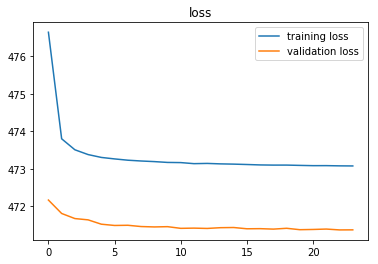

Plotting metrics...


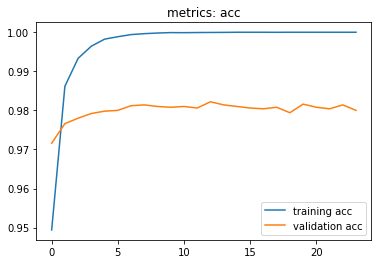

train {'acc': 0.99994546}
test {'acc': 0.9825}

Training student with temperature = 30 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 900 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13586208884558695684
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4617338880
locality {
  bus_id: 1
}
incarnation: 18328517737889125968
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.848762 , acc = 0.21 
Epoch 1 , step 100 , loss= 0.29395884 , acc = 0.91 
Epoch 1 , step 200 , loss= 0.3558508 , acc = 0.97 
Epoch 1 , step 300 , loss= 0.170582 , acc = 0.98 
Epoch 1 , step 400 , loss= 0.07687749 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.10843257 , acc = 1.0 
Epoch 1 , step 549 , loss= 0.12131125 val_loss= 0.10460022 , acc = 0.97 val acc = 0.9686 
Epoch 1 finished, loss= 0.2498483 val loss= 0.10460022 ,  acc = 0.9478546 val acc = 0.9686
val_acc i

Epoch 17 , step 100 , loss= 0.0019488387 , acc = 1.0 
Epoch 17 , step 200 , loss= 0.0020283116 , acc = 1.0 
Epoch 17 , step 300 , loss= 0.00032989949 , acc = 1.0 
Epoch 17 , step 400 , loss= 0.00047805242 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0402786 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.0006209945 val_loss= 0.11849369 , acc = 1.0 val acc = 0.9808 
Epoch 17 finished, loss= 0.015495886 val loss= 0.11849369 ,  acc = 0.9995819 val acc = 0.9808

Epoch 18 , step 50 , loss= 0.00011093563 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.05668849 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.029161613 , acc = 1.0 
Epoch 18 , step 350 , loss= 0.0007031643 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0027502 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.0010618937 val_loss= 0.10634082 , acc = 1.0 val acc = 0.9788 
Epoch 18 finished, loss= 0.009942814 val loss= 0.10634082 ,  acc = 0.999709 val acc = 0.9788

Epoch 19 , step 0 , loss= 0.0014513062 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.0029464257 ,

Epoch 34 , step 50 , loss= 0.020918753 , acc = 1.0 
Epoch 34 , step 150 , loss= 0.00033825223 , acc = 1.0 
Epoch 34 , step 250 , loss= 2.991838e-06 , acc = 1.0 
Epoch 34 , step 350 , loss= 1.0887223e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.04243209 , acc = 0.99 
Epoch 34 , step 549 , loss= 1.1682218e-06 val_loss= 0.12312556 , acc = 1.0 val acc = 0.9856 
Epoch 34 finished, loss= 0.005950594 val loss= 0.12312556 ,  acc = 0.9998545 val acc = 0.9856
val_acc improved. 
Epoch 35 , step 0 , loss= 8.419729e-06 , acc = 1.0 
Epoch 35 , step 100 , loss= 2.8451846e-05 , acc = 1.0 
Epoch 35 , step 200 , loss= 7.6262535e-05 , acc = 1.0 
Epoch 35 , step 300 , loss= 1.259485e-05 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.0007583927 , acc = 1.0 
Epoch 35 , step 500 , loss= 0.032302216 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.001850315 val_loss= 0.12580138 , acc = 1.0 val acc = 0.9838 
Epoch 35 finished, loss= 0.007795009 val loss= 0.12580138 ,  acc = 0.9998908 val acc = 0.9838

Epoch 36 , step 

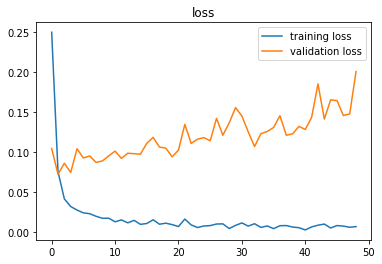

Plotting metrics...


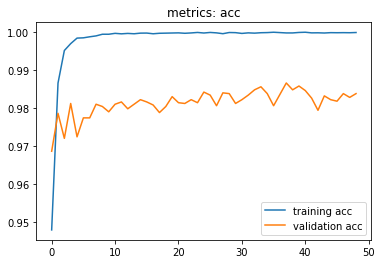

train {'acc': 0.9982909}
test {'acc': 0.9805}

{5: [{'acc': 0.983}, {'acc': 0.9847}, {'acc': 0.9846}, {'acc': 0.9844}, {'acc': 0.9805}], 10: [{'acc': 0.9834}, {'acc': 0.9833}, {'acc': 0.9835}, {'acc': 0.9836}, {'acc': 0.9815}], 15: [{'acc': 0.983}, {'acc': 0.9814}, {'acc': 0.9821}, {'acc': 0.9817}, {'acc': 0.9803}], 20: [{'acc': 0.9824}, {'acc': 0.9834}, {'acc': 0.9816}, {'acc': 0.9824}, {'acc': 0.9817}], 25: [{'acc': 0.9831}, {'acc': 0.9816}, {'acc': 0.9814}, {'acc': 0.9831}, {'acc': 0.9807}], 30: [{'acc': 0.9823}, {'acc': 0.9831}, {'acc': 0.9832}, {'acc': 0.9825}, {'acc': 0.9805}]}


In [15]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])
temperatures = [5,10,15,20,25,30]#[35,40]

list_exp2 = []
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    coef_soft_losses = [1.0, 0.75, 0.5, 0.25, 0.0]
    tmp_effect = temperature**2 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=50
            ,display_steps=100
            ,earlystop_params={'monitor':'val_acc', 'patience':10}
        )
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        # show result
        print('Student performance with',dict_exp)
#         print('Student performance with temperature =',temperature,
#              ', coef_softloss =',coef_softloss,',tmp_effi =', tmp_effect,'. ')
        student.plt_loss()
        student.plt_metrics()
        print('train',train_metric)
        print('test',test_metric)
        print()
        list_exp2.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp2 = pd.DataFrame(list_exp2)
print(test_metrics)

In [16]:
print(df_exp2)
print(df_exp2['test_acc'].mean())

    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            0.00           1.00            5                  25    0.9830   
1            0.25           0.75            5                  25    0.9847   
2            0.50           0.50            5                  25    0.9846   
3            0.75           0.25            5                  25    0.9844   
4            1.00           0.00            5                  25    0.9805   
5            0.00           1.00           10                 100    0.9834   
6            0.25           0.75           10                 100    0.9833   
7            0.50           0.50           10                 100    0.9835   
8            0.75           0.25           10                 100    0.9836   
9            1.00           0.00           10                 100    0.9815   
10           0.00           1.00           15                 225    0.9830   
11           0.25           0.75           15       

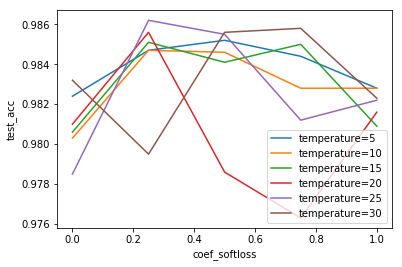

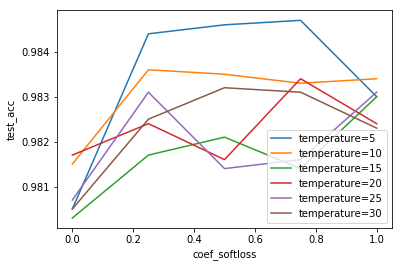

In [17]:
plot_trend(df_exp, label_x='coef_softloss', label_y='test_acc', label_line='temperature')
plot_trend(df_exp2, label_x='coef_softloss', label_y='test_acc', label_line='temperature')

In [18]:

# close_session(session)